<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Parsing-site" data-toc-modified-id="Parsing-site-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Parsing site</a></span><ul class="toc-item"><li><span><a href="#Loading-the-site,-bypassing-the-shadow-object,-getting-the-necessary-page-for-parsing" data-toc-modified-id="Loading-the-site,-bypassing-the-shadow-object,-getting-the-necessary-page-for-parsing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading the site, bypassing the shadow object, getting the necessary page for parsing</a></span></li><li><span><a href="#Parsing-script" data-toc-modified-id="Parsing-script-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parsing script</a></span></li><li><span><a href="#Saving-the-result-to-CSV-file" data-toc-modified-id="Saving-the-result-to-CSV-file-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Saving the result to CSV file</a></span></li></ul></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Functions-for-data-preprocessing" data-toc-modified-id="Functions-for-data-preprocessing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Functions for data preprocessing</a></span></li><li><span><a href="#Data-loading-and-preprocessing" data-toc-modified-id="Data-loading-and-preprocessing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data loading and preprocessing</a></span><ul class="toc-item"><li><span><a href="#Data-overview" data-toc-modified-id="Data-overview-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Data overview</a></span></li><li><span><a href="#Checking-for-duplicates-and-gaps" data-toc-modified-id="Checking-for-duplicates-and-gaps-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Checking for duplicates and gaps</a></span></li><li><span><a href="#Delete-duplicates" data-toc-modified-id="Delete-duplicates-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Delete duplicates</a></span></li><li><span><a href="#Analysis-of-ununique-links" data-toc-modified-id="Analysis-of-ununique-links-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Analysis of ununique links</a></span></li><li><span><a href="#Analysis-of-gaps" data-toc-modified-id="Analysis-of-gaps-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Analysis of gaps</a></span></li><li><span><a href="#Analysis-of-the-districts-column" data-toc-modified-id="Analysis-of-the-districts-column-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>Analysis of the districts column</a></span></li><li><span><a href="#Analysis-of-area-column" data-toc-modified-id="Analysis-of-area-column-2.2.7"><span class="toc-item-num">2.2.7&nbsp;&nbsp;</span>Analysis of area column</a></span></li><li><span><a href="#Analysis-of-price-column" data-toc-modified-id="Analysis-of-price-column-2.2.8"><span class="toc-item-num">2.2.8&nbsp;&nbsp;</span>Analysis of price column</a></span></li></ul></li></ul></li><li><span><a href="#A-brief-research-analysis" data-toc-modified-id="A-brief-research-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>A brief research analysis</a></span><ul class="toc-item"><li><span><a href="#District-and-number-of-rooms" data-toc-modified-id="District-and-number-of-rooms-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>District and number of rooms</a></span></li><li><span><a href="#Area" data-toc-modified-id="Area-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Area</a></span></li><li><span><a href="#Cost-of-apartments" data-toc-modified-id="Cost-of-apartments-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cost of apartments</a></span></li><li><span><a href="#Agencies" data-toc-modified-id="Agencies-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Agencies</a></span></li><li><span><a href="#Street" data-toc-modified-id="Street-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Street</a></span></li><li><span><a href="#Details" data-toc-modified-id="Details-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Details</a></span><ul class="toc-item"><li><span><a href="#Newly-built" data-toc-modified-id="Newly-built-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Newly built</a></span></li><li><span><a href="#In-construction" data-toc-modified-id="In-construction-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>In construction</a></span></li><li><span><a href="#After-the-renovation" data-toc-modified-id="After-the-renovation-3.6.3"><span class="toc-item-num">3.6.3&nbsp;&nbsp;</span>After the renovation</a></span></li><li><span><a href="#The-collective" data-toc-modified-id="The-collective-3.6.4"><span class="toc-item-num">3.6.4&nbsp;&nbsp;</span>The collective</a></span></li><li><span><a href="#Panel-building" data-toc-modified-id="Panel-building-3.6.5"><span class="toc-item-num">3.6.5&nbsp;&nbsp;</span>Panel building</a></span></li></ul></li></ul></li></ul></div>

The purpose of my work was to gain experience in parsing sites and additionally to do a little research on the analysis of apartment sales in Prague.

As a result of parsing I received 5397 rows with ads. Each row contains 10 columns. It was an interesting experience to get the data from the website and also to get some insights about real estate in Prague.

In [1]:
import requests
from bs4 import BeautifulSoup as bf
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
import pyautogui
import pandas as pd
import numpy as np
from time import sleep
import unicodedata
from matplotlib import pyplot as plt
import seaborn as sns

## Parsing site

### Loading the site, bypassing the shadow object, getting the necessary page for parsing

In [2]:
ser = Service(r'C:\Users\MyPC\Downloads\chromedriver')
driver = webdriver.Chrome(service=ser)
url = 'https://www.sreality.cz/hledani/byty'
driver.get(url)
sleep(10)

#interaction with the shadow object
pyautogui.click(x=425, y=531)
for i in range(9):
    pyautogui.press('TAB')
    sleep(1)
pyautogui.press('ENTER')

sleep(5)
input_tab = driver.find_element(By.XPATH, '//*[@id="page-layout"]/div[2]/div[3]/div[3]/div/div/div[1]/form/div[1]/div[9]/div[2]/div[1]/div/span/input')
input_tab.send_keys('obec Praha')
driver.find_element(By.XPATH, '//*[@id="page-layout"]/div[2]/div[3]/div[3]/div/div/div[1]/form/div[1]/div[9]/div[1]').click()
sleep(5)
driver.find_element(By.CSS_SELECTOR, '#page-layout > div.content-cover > div.content-inner > div.transcluded-content.ng-scope > div > div > div.filter.ng-scope > form > div.buttons.ng-scope > div > div > button').click()
sleep(5)

### Parsing script

In [3]:
data = []

for p in range(257):
    print(p)
    soup = bf(driver.page_source, 'lxml')
    ads = soup.find_all('div', class_ = 'property')
    for ad in ads:
        link = 'https://www.sreality.cz' + ad.find('a', class_ = 'title').get('ng-href')
        name = ad.find('span', class_ = 'name').text
        name = unicodedata.normalize("NFKD", name)
        locality = ad.find('span', class_ = 'locality').text
        price = ad.find('span', class_ = 'norm-price').text
        price = unicodedata.normalize("NFKD", price).replace(' ', '')[0:-3]
        area = name.split()[3]
        room_number = name.split()[2]                 
               
        try:
            street = locality.split(',')[0].rstrip()
        except:
            street = ''
        
        try:
            district = locality.split(',')[1].lstrip()        
        except:
            district = ''
    
        try:
            agency = ad.find('img', class_ = 'image').get('alt')        
        except:
            agency = ''
        
        details = (ad.get('data-dot-data').split(': ')[2]).replace(',', ', ')[0:-12]
    
        data.append([link, name, locality, price, area, room_number, street, district, agency, details])
        
    driver.find_element(By.CLASS_NAME, 'paging-next').click()
    sleep(10)
    
driver.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256


### Saving the result to CSV file

In [4]:
header = ['link', 'name', 'locality', 'price', 'area', 'room_number', 'street', 'district', 'agency', 'details']
df = pd.DataFrame(data, columns=header)
df.to_csv(r'C:\Users\MyPC\Yandex_Praktikum\Parser\sreality.csv', index=False)

## Data preparation

### Functions for data preprocessing

In [5]:
def data_exploration(name_set):
    
    '''This function outputs data using three methods: head, info, describe'''
    
    display(name_set.head(5))
    print()
    print()
    name_set.info()
    print()
    print()
    display(name_set.describe())
    
#---------------------------------------------------------------------------------------------------    
    
def find_duplicates(name_set):
    
    '''Function check for obvious duplicates'''
    
    if name_set.duplicated().sum() == 0:
        print(f'No duplicates found in the dataset.')
        print('--------------------------------------------')    
        print()
    else:
        print(f'{name_set.duplicated().sum()} duplicates found in the dataset.')    
        print('--------------------------------------------')    
        print()
        
#---------------------------------------------------------------------------------------------------           
        
def unique_value_check(name_set):
    
    '''Checking unique values'''        
    
    print('Checking for unique values')
    print('-----------------------------------------------')
    print()
    for column in name_set.columns:
        if column in ('area', 'room_number', 'district'):
            print(f'{column}: {sorted(name_set.loc[name_set[column].notna(), column].unique())}')
            print()
            print()
        if column == 'link':
            display(name_set.groupby('link').agg({'link': 'count'}).rename(columns={'link': 'count'}) \
                                            .sort_values('count', ascending=False).head(5))
            print()
            print()
            
#---------------------------------------------------------------------------------------------------           
            
def empty_values(name_set, size):
    
    '''The function displays the percentage of empty values as a graph'''
    
    ax = round(name_set.isna().sum() / name_set.shape[0] * 100, 2).to_frame('percent').query("percent > 0") \
                                                                  .sort_values('percent', ascending=True) \
                                                                  .plot.barh(figsize=size,
                                                                             color='#43B3DC', 
                                                                             fontsize=12, 
                                                                             ec='steelblue', 
                                                                             legend=False)
        
    ax.set_title('Percentage of empty values in the dataset', loc='left', fontsize = 18, fontweight='normal', y=1.05)

    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
    
    ax.grid(b=True, linewidth=0.9, alpha=0.25)

    for i in ax.patches:
        plt.text(i.get_width()+1, i.get_y()+0.18,
             str(i.get_width()) + '%',
             fontsize=10)

### Data loading and preprocessing

In [6]:
ads = pd.read_csv('sreality.csv')

#### Data overview

In [7]:
data_exploration(ads)

,link,name,locality,price,area,room_number,street,district,agency,details
0,https://www.sreality.cz/detail/prodej/byt/4+kk...,Prodej bytu 4+kk 133 m2,Praha 9 - Černý Most,13869000,133,4+kk,Praha 9 - Černý Most,NaN,CANABA rodinné domy,"""Terasa, Garáž, Metro 7 min. pěšky"""
1,https://www.sreality.cz/detail/prodej/byt/2+kk...,Prodej bytu 2+kk 74 m2,"Klausova, Praha 5 - Stodůlky",7900000,74,2+kk,Klausova,Praha 5 - Stodůlky,NaN,"""Nevybavený"""
2,https://www.sreality.cz/detail/prodej/byt/4+1/...,Prodej bytu 4+1 97 m2,"Drtinova, Praha 5 - Smíchov",13900000,97,4+1,Drtinova,Praha 5 - Smíchov,NaN,"""Nevybavený, Lékař 7 min. pěšky"""
3,https://www.sreality.cz/detail/prodej/byt/3+1/...,Prodej bytu 3+1 71 m2,"Plavecká, Praha 2 - Nové Město",11380000,71,3+1,Plavecká,Praha 2 - Nové Město,NaN,"""Částečně vybavený, Metro 7 min. pěšky"""
4,https://www.sreality.cz/detail/prodej/byt/1+kk...,Prodej bytu 1+kk 27 m2,"Nádražní, Praha - Praha 5",5541068,27,1+kk,Nádražní,Praha - Praha 5,Trigema a.s.,"""Ve výstavbě"""




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   link         5397 non-null   object
 1   name         5397 non-null   object
 2   locality     5397 non-null   object
 3   price        5397 non-null   object
 4   area         5397 non-null   object
 5   room_number  5397 non-null   object
 6   street       5397 non-null   object
 7   district     4877 non-null   object
 8   agency       2604 non-null   object
 9   details      5397 non-null   object
dtypes: object(10)
memory usage: 421.8+ KB




,link,name,locality,price,area,room_number,street,district,agency,details
count,5397,5397,5397,5397,5397,5397,5397,4877,2604,5397
unique,5104,972,1885,2050,240,12,1663,174,268,1484
top,https://www.sreality.cz/detail/prodej/byt/4+kk...,Prodej bytu 4+kk 133 m2,"V Háji, Praha 7 - Holešovice",Infooceně,133,2+kk,V Háji,Praha 7 - Holešovice,YIT Stavo s.r.o.,""""""
freq,107,107,159,280,109,1516,159,273,364,1204


#### Checking for duplicates and gaps

In [8]:
find_duplicates(ads)

234 duplicates found in the dataset.
--------------------------------------------



In [9]:
unique_value_check(ads)

Checking for unique values
-----------------------------------------------



,count
link,
https://www.sreality.cz/detail/prodej/byt/4+kk/praha-cerny-most-/4061265500,107
https://www.sreality.cz/detail/prodej/byt/1+kk/praha-holesovice-v-haji/3105040732,28
https://www.sreality.cz/detail/prodej/byt/1+kk/praha-holesovice-v-haji/954328652,28
https://www.sreality.cz/detail/prodej/byt/1+kk/praha-holesovice-v-haji/3322095964,27
https://www.sreality.cz/detail/prodej/byt/1+kk/praha-holesovice-v-haji/1637455436,27




area: ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '182', '183', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '20', '200', '201', '202', '203', '204', '206', '208', '209', '21', '211', '212', '213', '215', '216', '217', '218', '22', '220', '222', '223', '225', '226', '228', '229', '23', '230', '232', '235', '237', '238', '24', '240', '241', '245', '247', '25', '250', '251', '25

Highlight the problems of dataset:
- obvious duplicates;
- duplicates of links;
- **_area_** column has wrong type and has strange value **_pokojů_**;
- **_district_** column has more ununique values;
- the **_price_** column has wrong type

#### Delete duplicates

The function found 234 duplicates. Let's remove them.

In [10]:
ads = ads.drop_duplicates()

#### Analysis of ununique links

The function showed that some links have a frequency of more then one.

In [11]:
ads.query('link == "https://www.sreality.cz/detail/prodej/byt/4+kk/praha-cerny-most-/4061265500"').head(5)

,link,name,locality,price,area,room_number,street,district,agency,details
0,https://www.sreality.cz/detail/prodej/byt/4+kk...,Prodej bytu 4+kk 133 m2,Praha 9 - Černý Most,13869000,133,4+kk,Praha 9 - Černý Most,NaN,CANABA rodinné domy,"""Terasa, Garáž, Metro 7 min. pěšky"""
126,https://www.sreality.cz/detail/prodej/byt/4+kk...,Prodej bytu 4+kk 133 m2,Praha 9 - Černý Most,13869000,133,4+kk,Praha 9 - Černý Most,NaN,CANABA rodinné domy,"""Novostavba, Terasa, Garáž"""
168,https://www.sreality.cz/detail/prodej/byt/4+kk...,Prodej bytu 4+kk 133 m2,Praha 9 - Černý Most,13869000,133,4+kk,Praha 9 - Černý Most,NaN,CANABA rodinné domy,"""Terasa"""
231,https://www.sreality.cz/detail/prodej/byt/4+kk...,Prodej bytu 4+kk 133 m2,Praha 9 - Černý Most,13869000,133,4+kk,Praha 9 - Černý Most,NaN,CANABA rodinné domy,"""Novostavba, Garáž"""
336,https://www.sreality.cz/detail/prodej/byt/4+kk...,Prodej bytu 4+kk 133 m2,Praha 9 - Černý Most,13869000,133,4+kk,Praha 9 - Černý Most,NaN,CANABA rodinné domy,"""Novostavba, Terasa, Garáž, Metro 7 min. pěšky"""


In [12]:
ads.query('link == "https://www.sreality.cz/detail/prodej/byt/1+kk/praha-holesovice-v-haji/3105040732"').head()

,link,name,locality,price,area,room_number,street,district,agency,details
63,https://www.sreality.cz/detail/prodej/byt/1+kk...,Prodej bytu 1+kk 43 m2,"V Háji, Praha 7 - Holešovice",6909025,43,1+kk,V Háji,Praha 7 - Holešovice,NaN,""""""
525,https://www.sreality.cz/detail/prodej/byt/1+kk...,Prodej bytu 1+kk 43 m2,"V Háji, Praha 7 - Holešovice",6909025,43,1+kk,V Háji,Praha 7 - Holešovice,NaN,"""Balkon"""
5250,https://www.sreality.cz/detail/prodej/byt/1+kk...,Prodej bytu 1+kk 43 m2,"V Háji, Praha 7 - Holešovice",6909025,43,1+kk,V Háji,Praha 7 - Holešovice,NaN,"""Výtah, Tramvaj 1 min. pěšky, Sportoviště 4 mi..."


In [13]:
ads.query('link == "https://www.sreality.cz/detail/prodej/byt/1+kk/praha-holesovice-v-haji/954328652"').head(5)

,link,name,locality,price,area,room_number,street,district,agency,details
147,https://www.sreality.cz/detail/prodej/byt/1+kk...,Prodej bytu 1+kk 28 m2,"V Háji, Praha 7 - Holešovice",5031600,28,1+kk,V Háji,Praha 7 - Holešovice,NaN,""""""
3150,https://www.sreality.cz/detail/prodej/byt/1+kk...,Prodej bytu 1+kk 28 m2,"V Háji, Praha 7 - Holešovice",5031600,28,1+kk,V Háji,Praha 7 - Holešovice,NaN,"""Sportoviště 4 min. pěšky"""
4242,https://www.sreality.cz/detail/prodej/byt/1+kk...,Prodej bytu 1+kk 28 m2,"V Háji, Praha 7 - Holešovice",5031600,28,1+kk,V Háji,Praha 7 - Holešovice,NaN,"""Výtah, Tramvaj 1 min. pěšky"""
4284,https://www.sreality.cz/detail/prodej/byt/1+kk...,Prodej bytu 1+kk 28 m2,"V Háji, Praha 7 - Holešovice",5031600,28,1+kk,V Háji,Praha 7 - Holešovice,NaN,"""Tramvaj 1 min. pěšky"""
4830,https://www.sreality.cz/detail/prodej/byt/1+kk...,Prodej bytu 1+kk 28 m2,"V Háji, Praha 7 - Holešovice",5031600,28,1+kk,V Háji,Praha 7 - Holešovice,NaN,"""Výtah, Tramvaj 1 min. pěšky, Sportoviště 4 mi..."


These ads differ only in detail. It seems that some agencies have no control over their own ads. Three examples show that one such agency is **_Grygar reality_**. Let's find and remove the duplicate links, leaving only one link at a time.

In [14]:
ads = ads.reset_index()

In [15]:
index_and_links = ads.groupby('link').agg({'link': 'count'}).rename(columns={'link': 'count'}) \
                     .query('count > 1').reset_index()['link']
index_and_links = ads.query('link in @index_and_links')[['index', 'link']].groupby(['link']) \
                     .head(1)
index = list(index_and_links['index'])
link = list(index_and_links['link'])
indexes_to_remove_duplicates = list(ads.query('index not in @index and link in @link')['index'].unique())
ads = ads.query('index not in @indexes_to_remove_duplicates')

Make sure everything was deleted correctly.

In [16]:
ads.groupby('link').agg({'link' : 'count'}).rename(columns={'link': 'count'}) \
   .reset_index().query('count > 1')        

,link,count


The data set now has unique links.

#### Analysis of gaps

<ipython-input-5-827d145ab8e4>:67: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, linewidth=0.9, alpha=0.25)


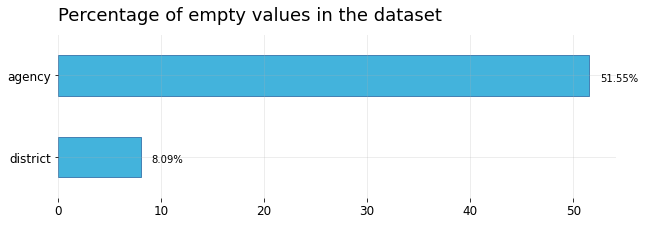

In [17]:
empty_values(ads, (10, 3))

Gaps in the **_agency_** column are normal because an ad can be published agency as well as a private person. Let's look at the rows where **_district_** is empty.

In [18]:
display(ads[ads['district'].isna()])

,index,link,name,locality,price,area,room_number,street,district,agency,details
0,0,https://www.sreality.cz/detail/prodej/byt/4+kk...,Prodej bytu 4+kk 133 m2,Praha 9 - Černý Most,13869000,133,4+kk,Praha 9 - Černý Most,NaN,CANABA rodinné domy,"""Terasa, Garáž, Metro 7 min. pěšky"""
27,27,https://www.sreality.cz/detail/prodej/byt/1+kk...,Prodej bytu 1+kk 45 m2,Praha 10 - Hostivař,4350000,45,1+kk,Praha 10 - Hostivař,NaN,NaN,"""Terasa"""
28,28,https://www.sreality.cz/detail/prodej/byt/1+kk...,Prodej bytu 1+kk 32 m2,Praha 10 - Hostivař,4100000,32,1+kk,Praha 10 - Hostivař,NaN,NaN,""""""
41,41,https://www.sreality.cz/detail/prodej/byt/2+kk...,Prodej bytu 2+kk 48 m2,Praha 10 - Praha-Kolovraty,5934800,48,2+kk,Praha 10 - Praha-Kolovraty,NaN,NaN,""""""
43,43,https://www.sreality.cz/detail/prodej/byt/4+kk...,Prodej bytu 4+kk 90 m2,Praha 10 - Praha-Kolovraty,11052800,90,4+kk,Praha 10 - Praha-Kolovraty,NaN,NaN,""""""
...,...,...,...,...,...,...,...,...,...,...,...
5062,5294,https://www.sreality.cz/detail/prodej/byt/2+kk...,Prodej bytu 2+kk 49 m2,Praha 9,7850759,49,2+kk,Praha 9,NaN,YIT Stavo s.r.o.,""""""
5063,5295,https://www.sreality.cz/detail/prodej/byt/5+kk...,Prodej bytu 5+kk 115 m2,Praha 9,19621185,115,5+kk,Praha 9,NaN,YIT Stavo s.r.o.,"""Terasa"""
5077,5309,https://www.sreality.cz/detail/prodej/byt/3+kk...,Prodej bytu 3+kk 115 m2,Praha 6 - Praha-Lysolaje,14140000,115,3+kk,Praha 6 - Praha-Lysolaje,NaN,LANDIA management,"""Novostavba, Terasa"""
5098,5331,https://www.sreality.cz/detail/prodej/byt/4+kk...,Prodej bytu 4+kk 115 m2,Praha 7 - Bubeneč,23900000,115,4+kk,Praha 7 - Bubeneč,NaN,Svoboda & Williams,"""Po rekonstrukci"""


So, it seems that the agency or the person filled out the ad incorrectly - in the field locality specified only the district of Prague or the name of the city. That's why we see name of the district in the **_street_** column and gap in the **_district_** column. I'll fix it.

In [19]:
street_with_empty_district = list(ads.loc[ads['district'].isna(), 'street'])
ads.loc[ads['district'].isna(), 'district'] = ads.loc[ads['district'].isna(), 'street']
ads.loc[ads['street'].isin(street_with_empty_district), 'street'] = 'unfilled'

Check it.

In [20]:
ads.query('index in (27, 28, 41, 43)')

,index,link,name,locality,price,area,room_number,street,district,agency,details
27,27,https://www.sreality.cz/detail/prodej/byt/1+kk...,Prodej bytu 1+kk 45 m2,Praha 10 - Hostivař,4350000,45,1+kk,unfilled,Praha 10 - Hostivař,NaN,"""Terasa"""
28,28,https://www.sreality.cz/detail/prodej/byt/1+kk...,Prodej bytu 1+kk 32 m2,Praha 10 - Hostivař,4100000,32,1+kk,unfilled,Praha 10 - Hostivař,NaN,""""""
41,41,https://www.sreality.cz/detail/prodej/byt/2+kk...,Prodej bytu 2+kk 48 m2,Praha 10 - Praha-Kolovraty,5934800,48,2+kk,unfilled,Praha 10 - Praha-Kolovraty,NaN,""""""
43,43,https://www.sreality.cz/detail/prodej/byt/4+kk...,Prodej bytu 4+kk 90 m2,Praha 10 - Praha-Kolovraty,11052800,90,4+kk,unfilled,Praha 10 - Praha-Kolovraty,NaN,""""""


One more thing, in **_details_** column there are gaps like **_""_**. Let's, fix that. Replace **_""_** to **_unfilled_**.

In [21]:
ads.loc[ads['details'] == '""', 'details'] = 'unfilled'

In [22]:
ads.loc[ads['details'] == '""']

,index,link,name,locality,price,area,room_number,street,district,agency,details


#### Analysis of the districts column

One more thing I can do with **_district_** column. Let's look at the unique values of **_distric_** column.

In [23]:
list(ads['district'].unique())

['Praha 9 - Černý Most',
 'Praha 5 - Stodůlky',
 'Praha 5 - Smíchov',
 'Praha 2 - Nové Město',
 'Praha - Praha 5',
 'Praha 5 - Malá Strana',
 'Praha 3 - Žižkov',
 'Praha 5 - Zličín',
 'Praha 2 - Vinohrady',
 'Praha 6 - Bubeneč',
 'Praha 10 - Záběhlice',
 'Praha 4 - Chodov',
 'Praha 4 - Modřany',
 'Praha 9 - Prosek',
 'Praha 7 - Holešovice',
 'Praha 9 - Střížkov',
 'Praha 10 - Horní Měcholupy',
 'Praha - Košíře',
 'Praha 10 - Hostivař',
 'Praha - Stodůlky',
 'Praha 6 - Břevnov',
 'Praha 9 - Vysočany',
 'Praha 8 - Ďáblice',
 'Praha 10 - Strašnice',
 'Praha 10 - Královice',
 'Praha 10 - Praha-Kolovraty',
 'Praha 9 - Letňany',
 'Praha 9 - Újezd nad Lesy',
 'Praha 1 - Nové Město',
 'Praha 10 - Uhříněves',
 'Praha 9 - Hloubětín',
 'Praha - Újezd u Průhonic',
 'Praha 10 - Vinohrady',
 'Praha 8 - Kobylisy',
 'Praha 6 - Vokovice',
 'Praha 4 - Kunratice',
 'Praha 10 - Vršovice',
 'Praha 6 - Řepy',
 'Praha 9 - Libeň',
 'Praha 5 - Košíře',
 'Praha 2 - Nusle',
 'Praha 1 - Staré Město',
 'Praha 4 - 

Again incorrectly filled out ads. I have prepared a file with the districts of Prague, it remains to upload the data.

In [24]:
sheet_id = '1Y_suQLvfpQ0spQalTnA8Sn11nx2QKKdx8YYILmsaCMM'
districts_of_prague = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv')
dic_of_districts = dict(zip(districts_of_prague.old_name, districts_of_prague.new_name))
ads['district'] = ads['district'].map(dic_of_districts)

Check the unique values in the **_district_** column.

In [25]:
ads['district'].unique()

array(['Praha 9', 'Praha 5', 'Praha 2', 'Praha 3', 'Praha 6', 'Praha 10',
       'Praha 4', 'Praha 7', 'Praha 8', 'Praha 1', 'unknown', 'Praha 14',
       'Praha 11'], dtype=object)

#### Analysis of area column

First of all there is some strange value **_pokojů_** in the **_area_** column.

In [26]:
ads.query('area == "pokojů"').head(5)

,index,link,name,locality,price,area,room_number,street,district,agency,details
115,119,https://www.sreality.cz/detail/prodej/byt/6-a-...,Prodej bytu 6 pokojů a více 217 m2,"Dlouhá, Praha 1 - Staré Město",48500000,pokojů,6,Dlouhá,Praha 1,Svoboda & Williams,"""Po rekonstrukci, Garáž, Obchod 5 min. pěšky"""
365,384,https://www.sreality.cz/detail/prodej/byt/6-a-...,Prodej bytu 6 pokojů a více 248 m2,"Ke Kozím hřbetům, Praha - Suchdol",31500000,pokojů,6,Ke Kozím hřbetům,Praha 6,Protsenko & Co.,"""Garáž"""
480,503,https://www.sreality.cz/detail/prodej/byt/6-a-...,Prodej bytu 6 pokojů a více 205 m2,Praha 5 - Hlubočepy,Infooceně,pokojů,6,unfilled,Praha 5,NaN,unfilled
581,607,https://www.sreality.cz/detail/prodej/byt/6-a-...,Prodej bytu 6 pokojů a více 147 m2,"Pitkovická, Praha 10 - Strašnice",17987000,pokojů,6,Pitkovická,Praha 10,NaN,"""Terasa, Garáž, Částečně vybavený"""
1119,1168,https://www.sreality.cz/detail/prodej/byt/6-a-...,Prodej bytu 6 pokojů a více 507 m2,"Malostranské náměstí, Praha - Malá Strana",129000000,pokojů,6,Malostranské náměstí,Praha 1,NaN,"""Novostavba, Vybavený, Pošta 2 min. pěšky"""


Now it's clear - the exact area is not specified. Due to the fact that this column must store quantitative data, replace it with approximate quantitative data. 

In [27]:
area_of_room = []

for i in list(ads['name']):
    if 'pokojů' in i:  
        area_of_room.append(i.split()[6])
        
index_with_wrong_area = list(ads.loc[ads['area'] == 'pokojů', 'index'])

for elem, area in enumerate(ads.query('area == "pokojů"')['area']):
    ads.loc[(ads['area'] == area) & (ads['index'] == index_with_wrong_area[elem]), 'area'] = area_of_room[elem]

Сheck the fixes.

In [28]:
ads.query('index in @index_with_wrong_area').head(5)

,index,link,name,locality,price,area,room_number,street,district,agency,details
115,119,https://www.sreality.cz/detail/prodej/byt/6-a-...,Prodej bytu 6 pokojů a více 217 m2,"Dlouhá, Praha 1 - Staré Město",48500000,217,6,Dlouhá,Praha 1,Svoboda & Williams,"""Po rekonstrukci, Garáž, Obchod 5 min. pěšky"""
365,384,https://www.sreality.cz/detail/prodej/byt/6-a-...,Prodej bytu 6 pokojů a více 248 m2,"Ke Kozím hřbetům, Praha - Suchdol",31500000,248,6,Ke Kozím hřbetům,Praha 6,Protsenko & Co.,"""Garáž"""
480,503,https://www.sreality.cz/detail/prodej/byt/6-a-...,Prodej bytu 6 pokojů a více 205 m2,Praha 5 - Hlubočepy,Infooceně,205,6,unfilled,Praha 5,NaN,unfilled
581,607,https://www.sreality.cz/detail/prodej/byt/6-a-...,Prodej bytu 6 pokojů a více 147 m2,"Pitkovická, Praha 10 - Strašnice",17987000,147,6,Pitkovická,Praha 10,NaN,"""Terasa, Garáž, Částečně vybavený"""
1119,1168,https://www.sreality.cz/detail/prodej/byt/6-a-...,Prodej bytu 6 pokojů a více 507 m2,"Malostranské náměstí, Praha - Malá Strana",129000000,507,6,Malostranské náměstí,Praha 1,NaN,"""Novostavba, Vybavený, Pošta 2 min. pěšky"""


Change the type in the **_area_** column to integer values.

In [29]:
ads['area'] = ads.area.astype('int')

#### Analysis of price column

Change the type in the **_price_** column to integer values. But first of all, find the text values.

In [30]:
values_to_fix = []

for price in ads['price']:
    if 'cen' in price and price not in values_to_fix:
        values_to_fix.append(price)
print(values_to_fix)       

['Infooceně', 'Infooceněnado']


Change this values to **_0_**.

In [31]:
ads.loc[ads['price'].isin(values_to_fix), 'price'] = 0

Change the type in the **_price_** column to integer values.

In [32]:
ads['price'] = ads.price.astype('int')

Let's make the values in the **_price_** column in millions and rename column as **_price_in_million_**.

In [33]:
ads = ads.rename(columns={'price': 'price_in_million'})

In [34]:
ads['price_in_million'] = ads['price_in_million'] / 1000000

Let's look at the gap chart again.

<ipython-input-5-827d145ab8e4>:67: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, linewidth=0.9, alpha=0.25)


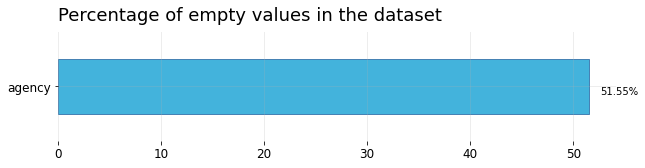

In [35]:
empty_values(ads, (10, 2))

There are only gaps in the **_agency_** column.

Data set has been prepared for further exploratory analysis.

## A brief research analysis

I will make some charts to understand the situation on the market for apartments for sale in Prague, taking into account the area, the number of rooms, prices and agencies.

In [36]:
ads.describe()

,index,price_in_million,area
count,5104.000000,5104.000000,5104.000000
mean,2709.164185,8.862400,73.833072
std,1554.027169,6.008285,45.550307
min,0.000000,0.000000,11.000000
25%,1365.500000,5.900000,49.000000
50%,2713.500000,7.493750,65.000000
75%,4052.500000,10.500000,85.000000
max,5396.000000,129.000000,911.000000


- the median price of apartments is 7.49 million Czech crowns and the maximum is 129 million - it's abnormal;
- the median area is 65  - it seems that 2+kk or 3+kk apartments often published. The minimum is 11 and the maximum is 911 - it's abnormal.

### District and number of rooms

In [37]:
def hisplot(plot, column, title, x):
    plt.figure(figsize=(15, 4))
    if plot == 'splot':
        splot = sns.histplot(x=column, data=ads, shrink=.8)
        plt.bar_label(splot.containers[0],size=12)
        
    if plot == 'plot':
        plot = sns.histplot(x=column, data=ads, shrink=.8)
        
    plt.title(title, fontsize=18, fontweight='regular', y=1.1, x=x)
    sns.despine()
    plt.show()

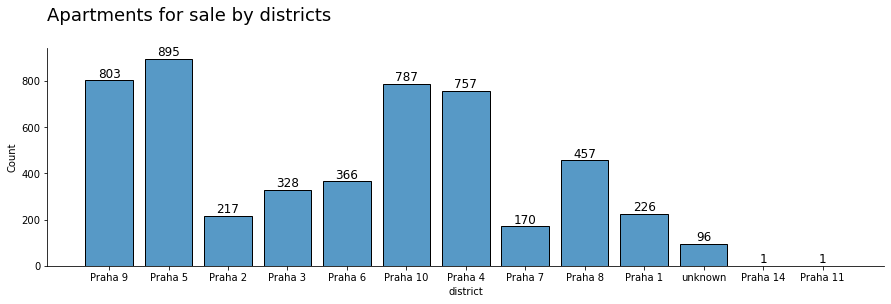

In [38]:
hisplot('splot', 'district', 'Apartments for sale by districts', 0.17)

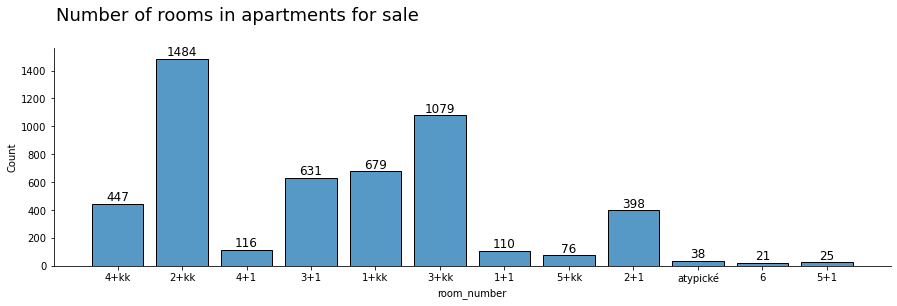

In [39]:
hisplot('splot', 'room_number', 'Number of rooms in apartments for sale', 0.22)

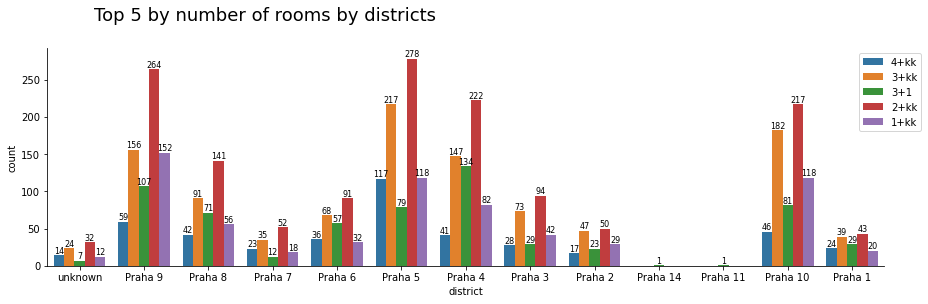

In [40]:
plt.figure(figsize=(15, 4))
splot = sns.barplot(x='district', y='count', hue='room_number', data=ads[ads['room_number'] \
                                                        .isin(['2+kk', '3+kk', '1+kk', '4+kk', '3+1'])] \
                                                        .groupby(['district', 'room_number']) \
                                                        .agg({'district': 'count'}) \
                                                        .rename(columns={'district': 'count'}) \
                                                        .reset_index() \
                                                        .sort_values('district', ascending=False))
plt.title('Top 5 by number of rooms by districts', fontsize=18, fontweight='regular', y=1.1, x=0.26)
plt.legend(bbox_to_anchor=(1.05, 1))
sns.despine()
for i in splot.containers:
    splot.bar_label(i, size=8)

### Area

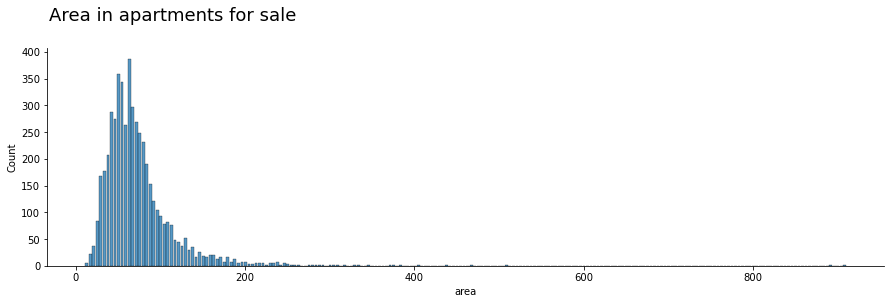

In [41]:
hisplot('plot', 'area', 'Area in apartments for sale', 0.15)

In [42]:
def boxplot(y_column, title, x):
    plt.figure(figsize=(6, 5))
    sns.boxplot(y=y_column, data=ads)
    plt.title(title, fontsize=18, fontweight='regular', y=1.1, x=x)    
    sns.despine()
    plt.show()

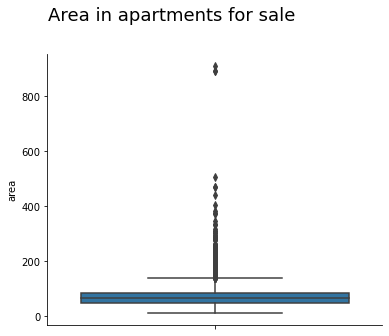

In [43]:
boxplot('area', 'Area in apartments for sale', 0.37)

In [44]:
def boxplot_multigraphic(y_column, x_column, title, x):
    plt.figure(figsize=(15, 6))
    sns.boxplot(y=y_column, x=x_column, data=ads)
    plt.title(title, fontsize=18, fontweight='regular', y=1.1, x=x)
    sns.despine()
    plt.show()

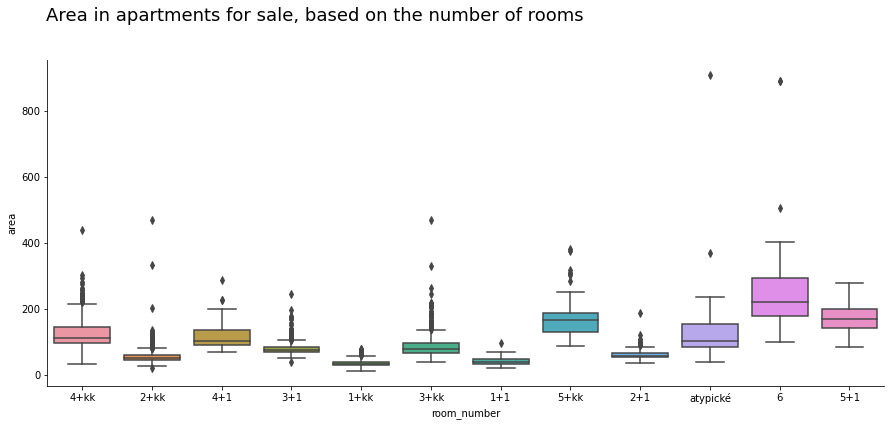

In [45]:
boxplot_multigraphic('area', 'room_number',
                     'Area in apartments for sale, based on the number of rooms', x=0.32)

In [46]:
def barplot(chart_version, name_set, x_column, y_column, agg_column, agg_value, ascending, title, x):
    plt.figure(figsize=(12, 4))    
     
    if chart_version == 1:
        data_1 = name_set.groupby(x_column).agg({agg_column: agg_value}).rename(columns={agg_column: agg_value}) \
                         .reset_index().sort_values(agg_value, ascending=ascending)
        data_1['median'] = round(data_1['median'], 2)
        splot = sns.barplot(x=x_column, y=y_column, data=data_1)    
        
        
    if chart_version == 2:
        data_2 = name_set[[x_column, y_column]].sort_values(y_column, ascending=ascending).groupby(x_column).head(1)        
        splot = sns.barplot(x=x_column, y=y_column, data=data_2)
        
    plt.title(title, fontsize = 18, fontweight='regular', y=1.1, x=x)
    sns.despine()
    plt.bar_label(splot.containers[0], size=12)
    plt.show()

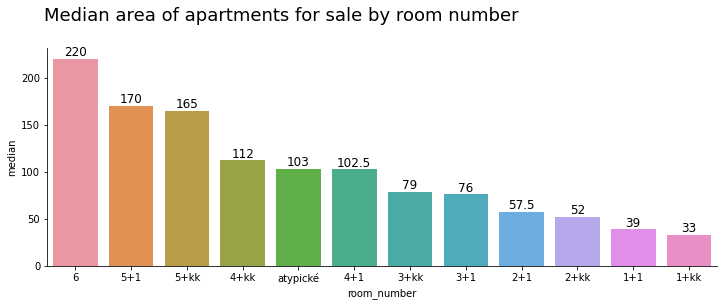

In [47]:
barplot(1, ads, 'room_number', 'median', 'area', 'median', False,
        'Median area of apartments for sale by room number', 0.35)

### Cost of apartments

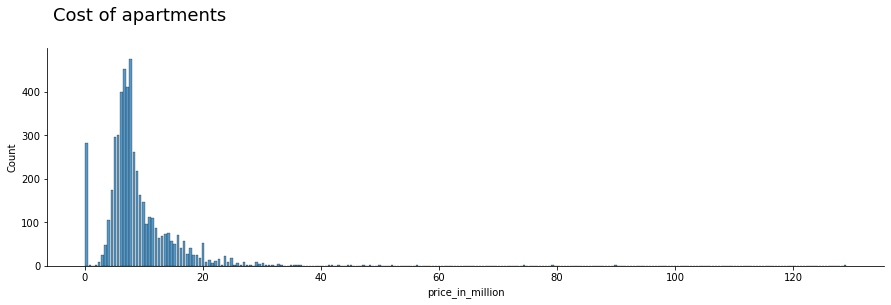

In [48]:
hisplot('plot', 'price_in_million', 'Cost of apartments', 0.11)

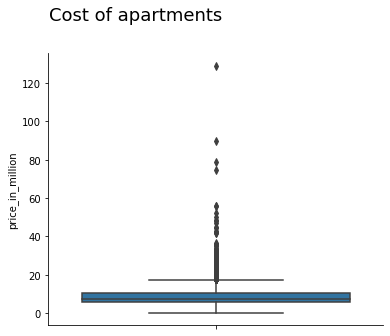

In [49]:
boxplot('price_in_million', 'Cost of apartments', 0.26)

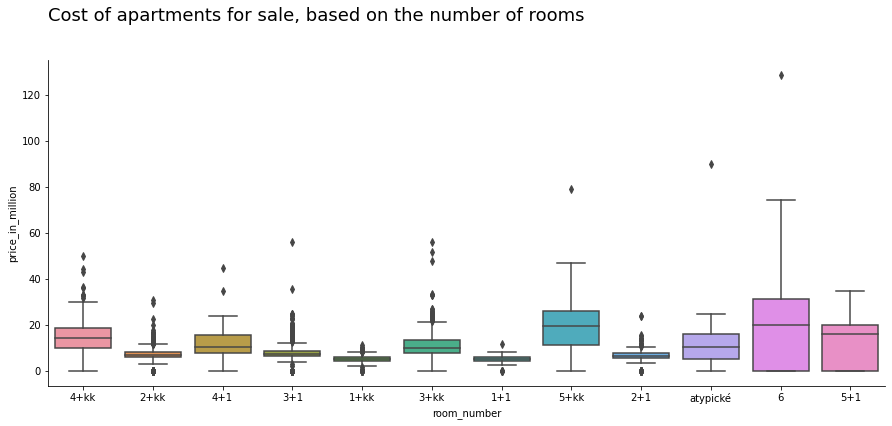

In [50]:
boxplot_multigraphic('price_in_million', 'room_number',
                     'Cost of apartments for sale, based on the number of rooms', x=0.32)

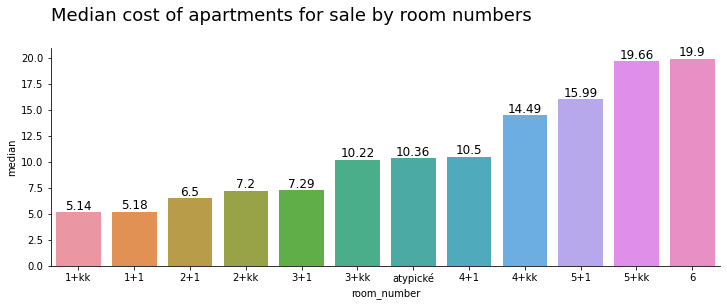

In [51]:
barplot(1, ads, 'room_number', 'median', 'price_in_million',
        'median', True, 'Median cost of apartments for sale by room numbers', 0.36)

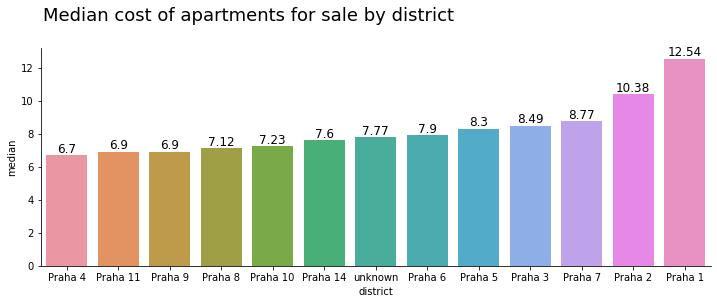

In [52]:
barplot(1, ads, 'district', 'median', 'price_in_million', 'median',
        True, 'Median cost of apartments for sale by district', 0.31)

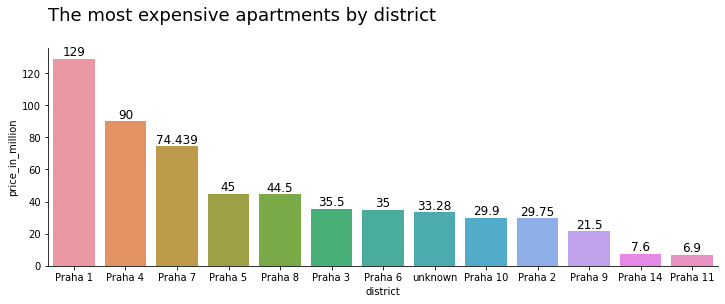

In [53]:
barplot(2, ads, 'district', 'price_in_million', None, None, False, 'The most expensive apartments by district', 0.29)

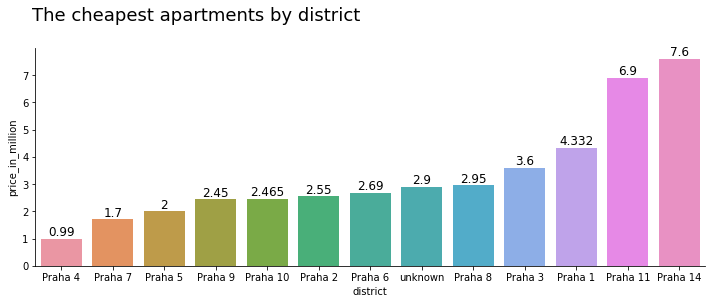

In [54]:
barplot(2, ads[ads['price_in_million'] != 0], 'district', 'price_in_million',
        None, None, True, 'The cheapest apartments by district', 0.24)

In [55]:
def barplot_with_subplot(agg_column, title, x):
    room_by_district = ads.groupby(['district', 'room_number']).agg({agg_column: 'median'}) \
                          .rename(columns={agg_column: 'median_cost_in_million'}).reset_index() \
                          .sort_values('median_cost_in_million', ascending=True)
    
    room_by_district['median_cost_in_million'] = round(room_by_district['median_cost_in_million'], 2)

    unique_districts = room_by_district.loc[room_by_district['district'] != 'unknown', 'district'].unique()

    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(18, 24))
    fig.subplots_adjust(hspace=0.5)
    fig.suptitle(title, fontsize=20, x=x)

    for ax, district in zip(axes.flatten(), unique_districts):
        ax = sns.barplot(y='median_cost_in_million', x='room_number', 
                         data=room_by_district[room_by_district['district'] == district], ax=ax)
        sns.despine()
        fig.subplots_adjust(top=0.93)    
        ax.set(title=district)    
        ax.bar_label(ax.containers[0], size=10)
        

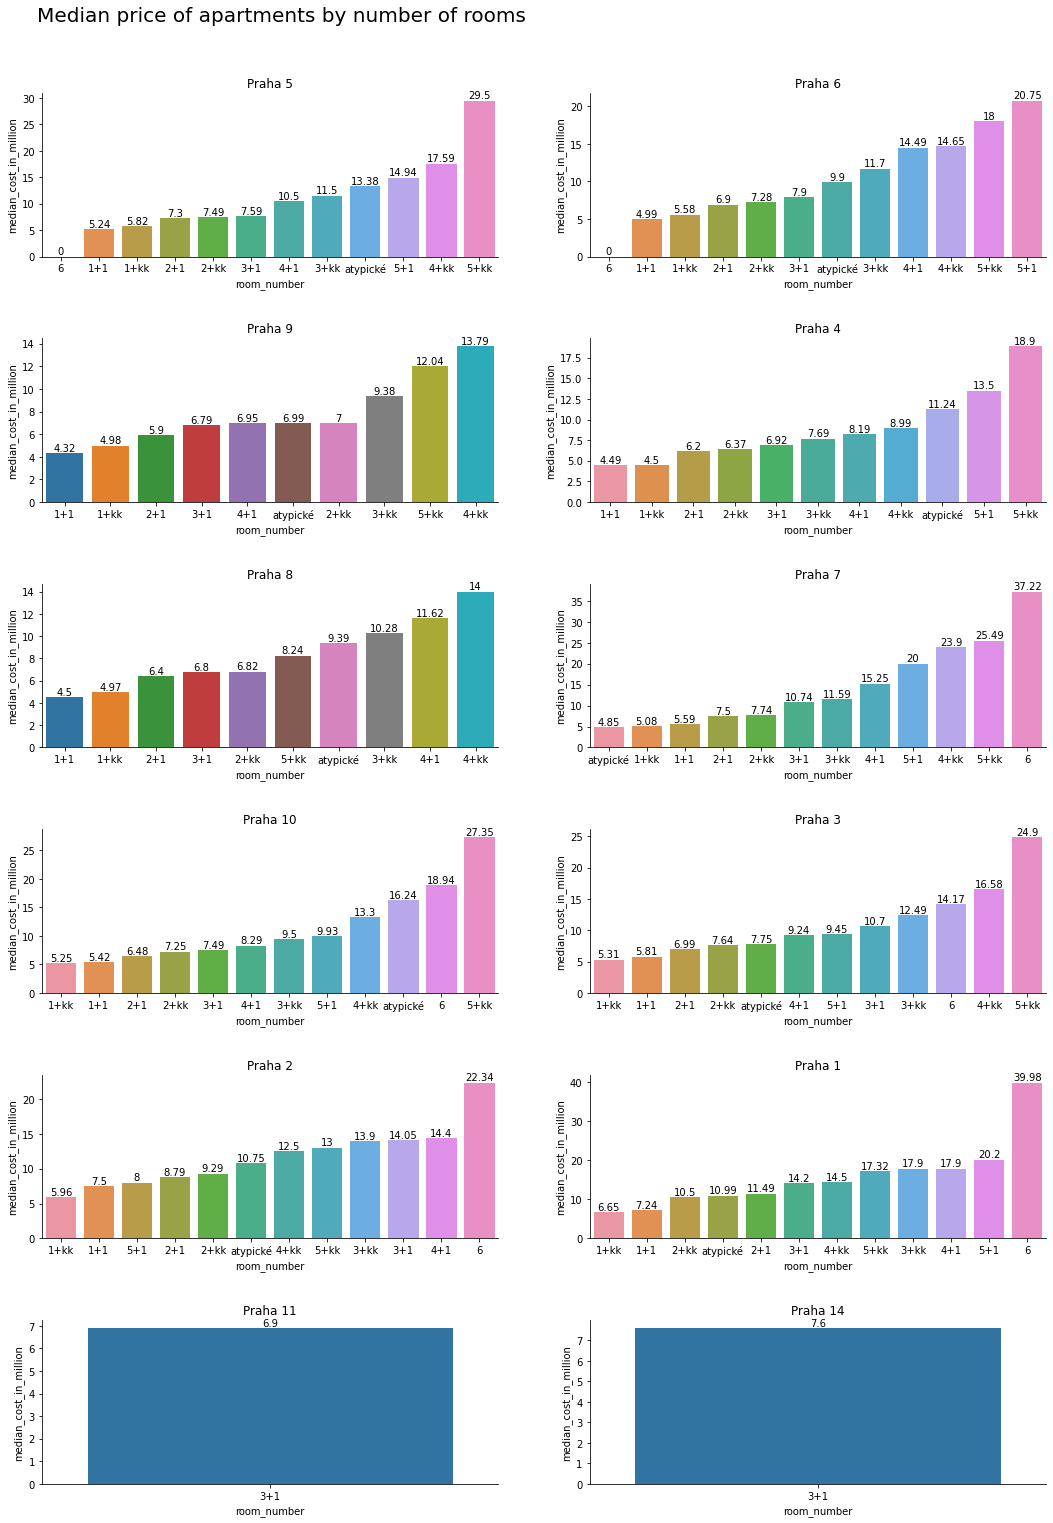

In [56]:
barplot_with_subplot('price_in_million', 'Median price of apartments by number of rooms', 0.31)

In [57]:
ads['price_per_square_meter'] = round(ads['price_in_million'] / ads['area'], 2)

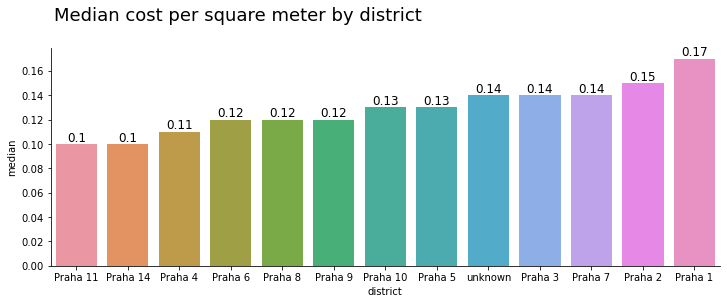

In [58]:
barplot(1, ads, 'district', 'median', 'price_per_square_meter',
        'median', True, 'Median cost per square meter by district', 0.28)

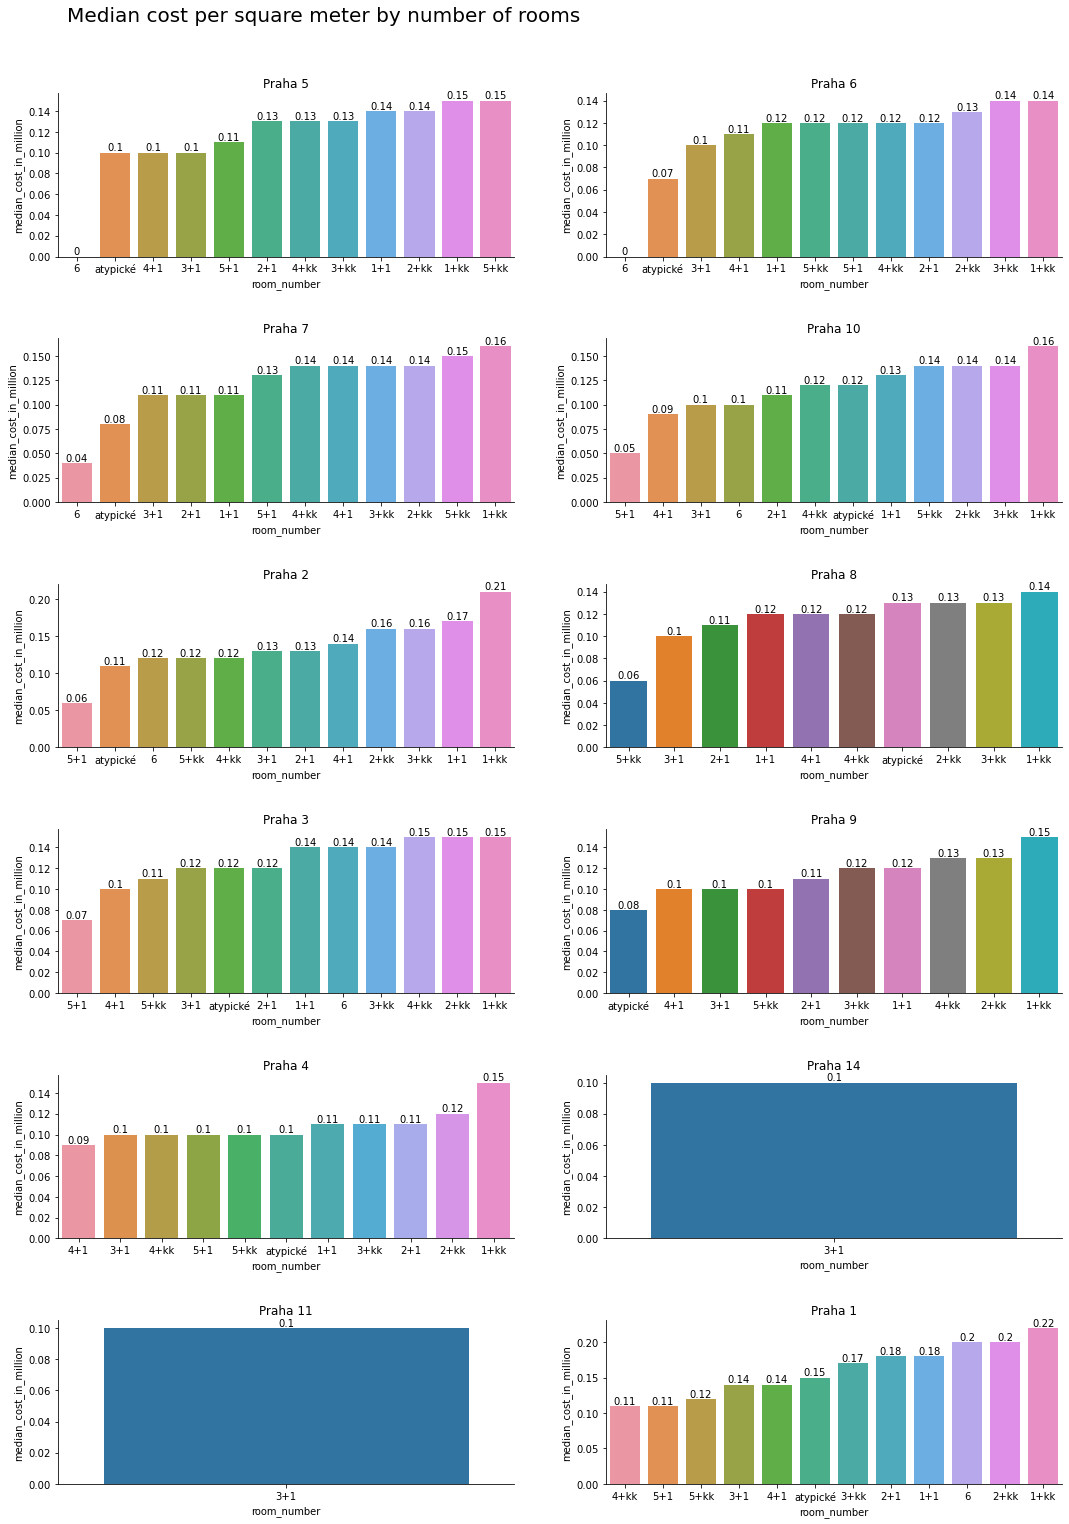

In [59]:
barplot_with_subplot('price_per_square_meter',
                     'Median cost per square meter by number of rooms', 0.33)

### Agencies

In [60]:
def vertical_barplot(name_set, x_column, y_column, title, x):
    plt.figure(figsize=(12, 7))
    splot = sns.barplot(x=x_column, y=y_column, data=name_set.groupby(y_column).agg({y_column: 'count'}) \
                                                     .rename(columns={y_column: 'count'}).reset_index() \
                                                     .sort_values('count', ascending=False).head(10))
    plt.title(title, fontsize = 18, fontweight='regular', y=1.1, x=x)
    sns.despine()
    plt.bar_label(splot.containers[0],size=12)
    plt.show()

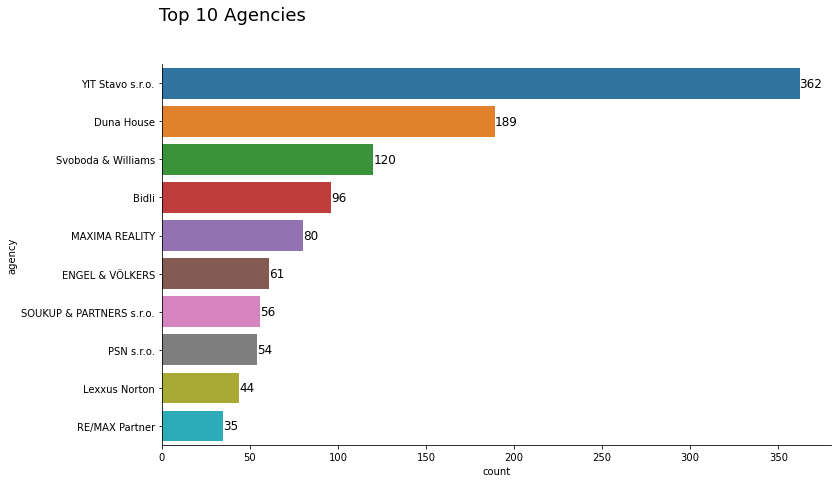

In [61]:
vertical_barplot(ads, 'count', 'agency', 'Top 10 Agencies', 0.105)

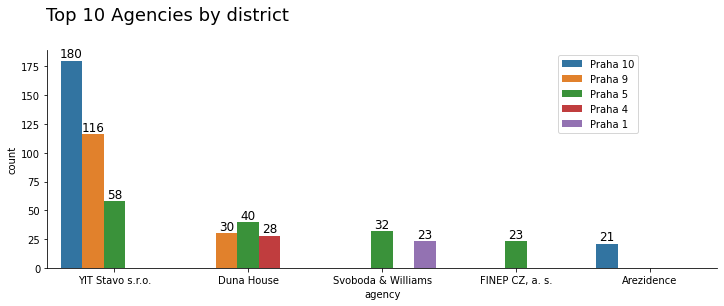

In [62]:
plt.figure(figsize=(12, 4))
splot = sns.barplot(x='agency', y='count', hue='district', data=ads.groupby(['agency', 'district']).agg({'agency': 'count'}) \
                                                           .rename(columns={'agency': 'count'}).reset_index() \
                                                           .sort_values('count', ascending=False).head(10))
plt.title('Top 10 Agencies by district', fontsize = 18, fontweight='regular', y=1.11, x=0.18)
plt.legend(bbox_to_anchor= (0.89, 1))
sns.despine()
for i in splot.containers:
    splot.bar_label(i, size=12)
plt.show()

### Street

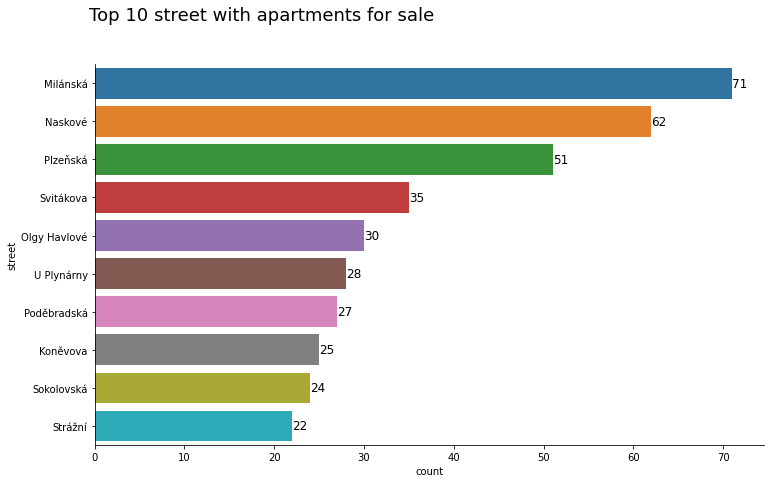

In [63]:
vertical_barplot(ads[ads['street'] != 'unfilled'], 'count',
                 'street', 'Top 10 street with apartments for sale', 0.25)

### Details

In [64]:
def details(detail):
    
    '''Finding additional details in the ads'''
    
    if 'Ve výstavbě' in detail.split(',')[0]:
        return 'In construction'
    if 'Po rekonstrukci' in detail.split(',')[0]:
        return 'After the renovation'
    if 'Družstevní' in detail.split(',')[0]:
        return 'The collective'
    if 'Novostavba' in detail.split(',')[0]:
        return 'Newly built'
    if 'Panelová' in detail.split(',')[0]:
        return 'Panel building'
    if 'Nevybavený' in detail.split(',')[0]:
        return 'Unfurnished'
    if 'Terasa' in detail.split(',')[0]:
        return 'Terassa'
    if 'Balkon' in detail.split(',')[0]:
        return 'Balcony'    
    if 'Lodžie' in detail.split(',')[0]:
        return 'Loggia'    
    if 'Parkování' in detail.split(',')[0] or 'Garáž' in detail.split(',')[0]:
        return 'Parking space'     
    return 'unknown'

ads['first_detail'] = ads['details'].apply(details)

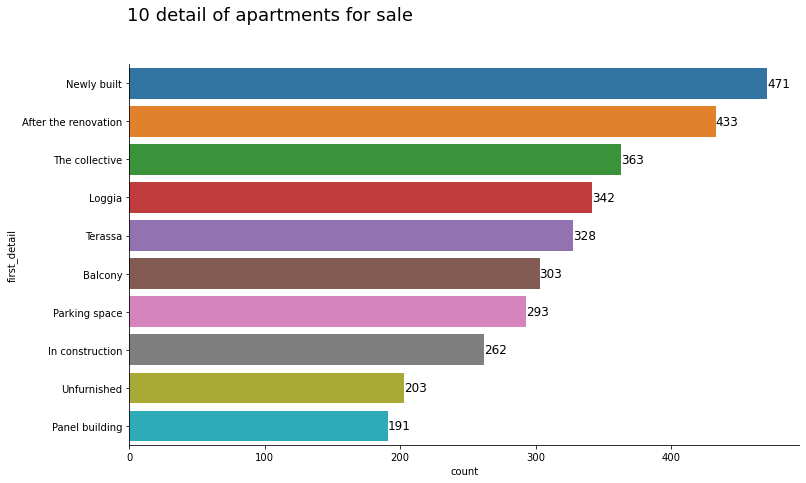

In [65]:
vertical_barplot(ads[ads['first_detail'] != 'unknown'], 'count',
                 'first_detail', '10 detail of apartments for sale', 0.21)

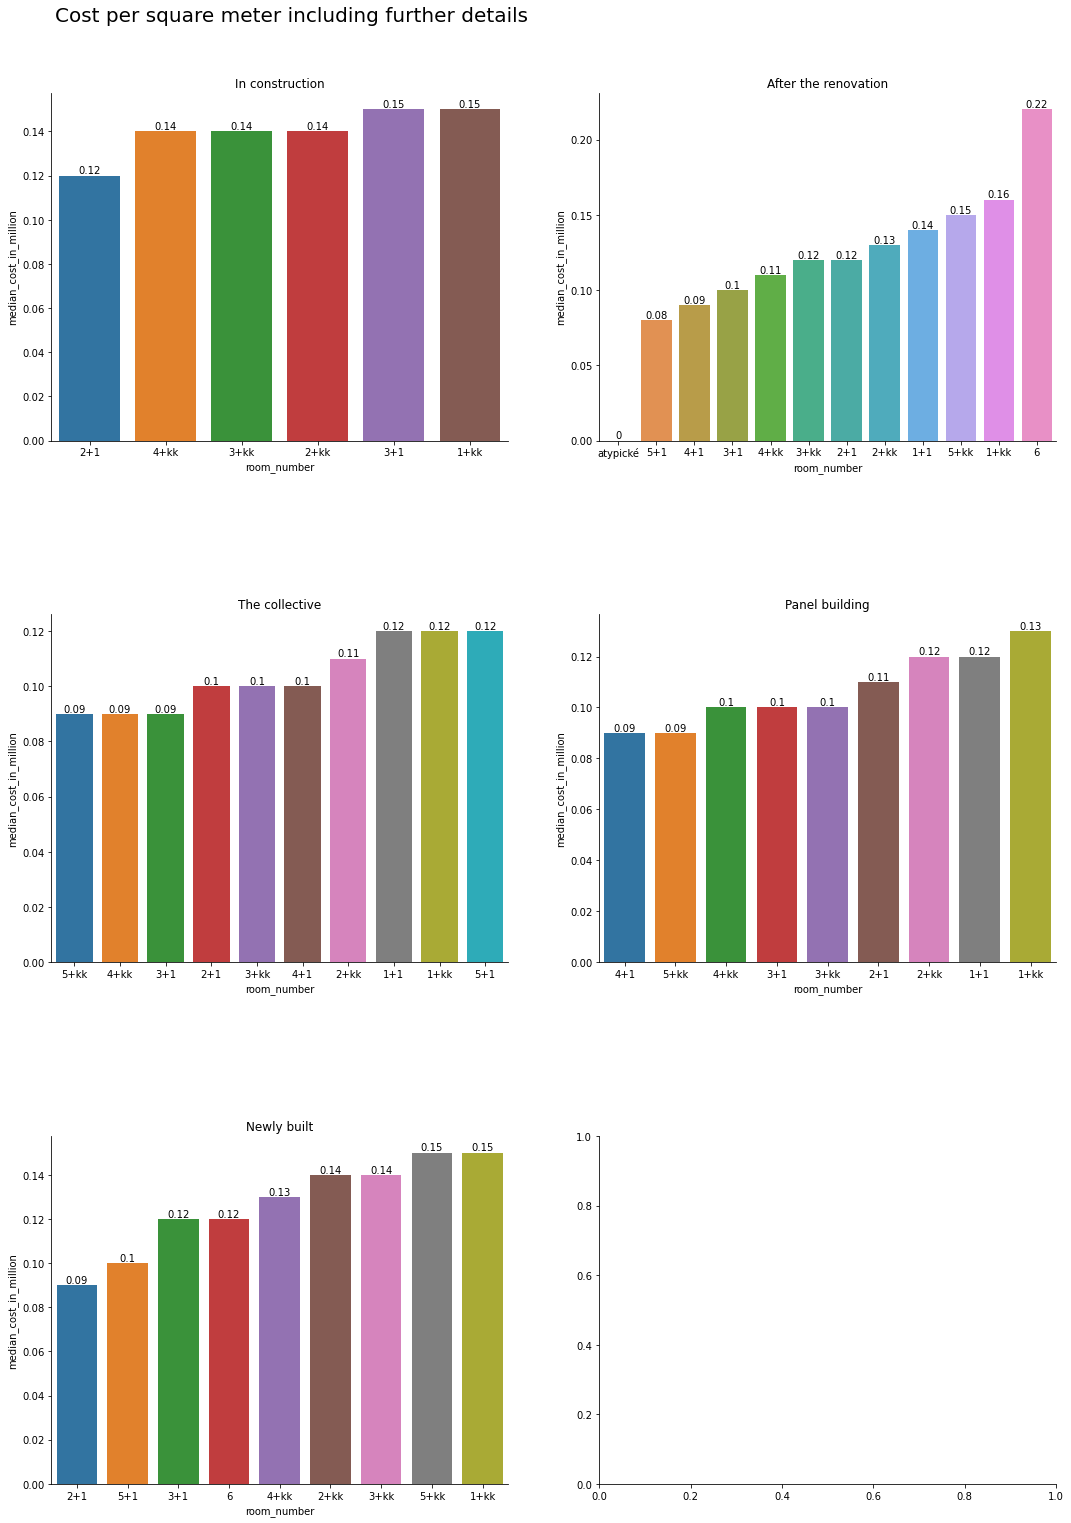

In [66]:
room_by_details = ads[ads['first_detail'].isin(['In construction', 'After the renovation', 
                              'The collective', 'Panel building', 'Newly built'])] \
                       .groupby(['first_detail', 'room_number']).agg({'price_per_square_meter': 'median'}) \
                       .rename(columns={'price_per_square_meter': 'median_cost_in_million'}) \
                       .reset_index().sort_values('median_cost_in_million', ascending=True)
    
room_by_details['median_cost_in_million'] = round(room_by_details['median_cost_in_million'], 2)

unique_first_details = ads[ads['first_detail'].isin(['In construction', 'After the renovation', 
                              'The collective', 'Panel building', 'Newly built'])]['first_detail'].unique()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 24))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Cost per square meter including further details', fontsize=20, x=0.31)

for ax, detail in zip(axes.flatten(), unique_first_details):
    ax = sns.barplot(y='median_cost_in_million', x='room_number', 
                     data=room_by_details[room_by_details['first_detail'] == detail], ax=ax)
    sns.despine()
    fig.subplots_adjust(top=0.93)    
    ax.set(title=detail)    
    ax.bar_label(ax.containers[0], size=10)

#### Newly built

In [67]:
def barplot_with_subplot_by_details(detail, agg_column, title, x):
    room_by_details = ads[ads['first_detail'] == detail].groupby(['district', 'room_number']) \
                     .agg({agg_column: 'median'}) \
                     .rename(columns={agg_column: 'median_cost_in_million'}) \
                     .reset_index().sort_values('median_cost_in_million', ascending=True)
    
    room_by_details['median_cost_in_million'] = round(room_by_details['median_cost_in_million'], 2)

    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 24))
    fig.subplots_adjust(hspace=0.5)
    fig.suptitle(title, fontsize=20, x=x)

    for ax, district in zip(axes.flatten(), room_by_details.loc[room_by_details['district'] != 'unknown', 'district'].unique()):
        ax = sns.barplot(y='median_cost_in_million', x='room_number', 
                         data=room_by_details[room_by_details['district'] == district], ax=ax)
        sns.despine()
        fig.subplots_adjust(top=0.93)    
        ax.set(title=district)    
        ax.bar_label(ax.containers[0], size=10)

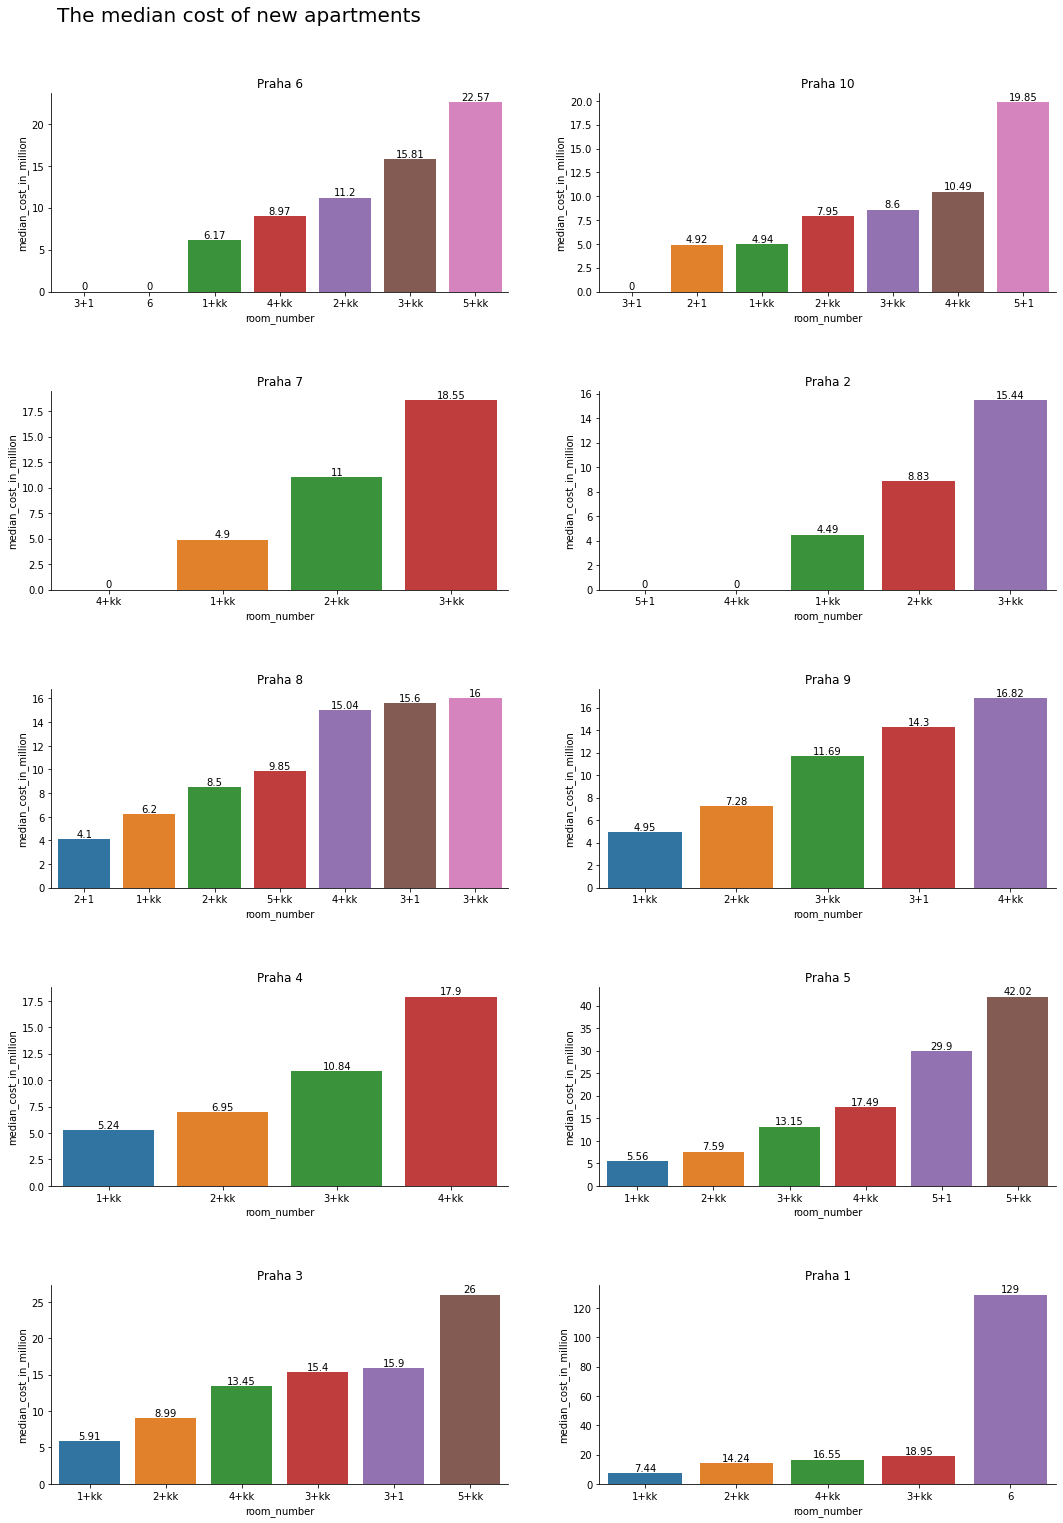

In [68]:
barplot_with_subplot_by_details('Newly built', 'price_in_million', 'The median cost of new apartments', 0.27)

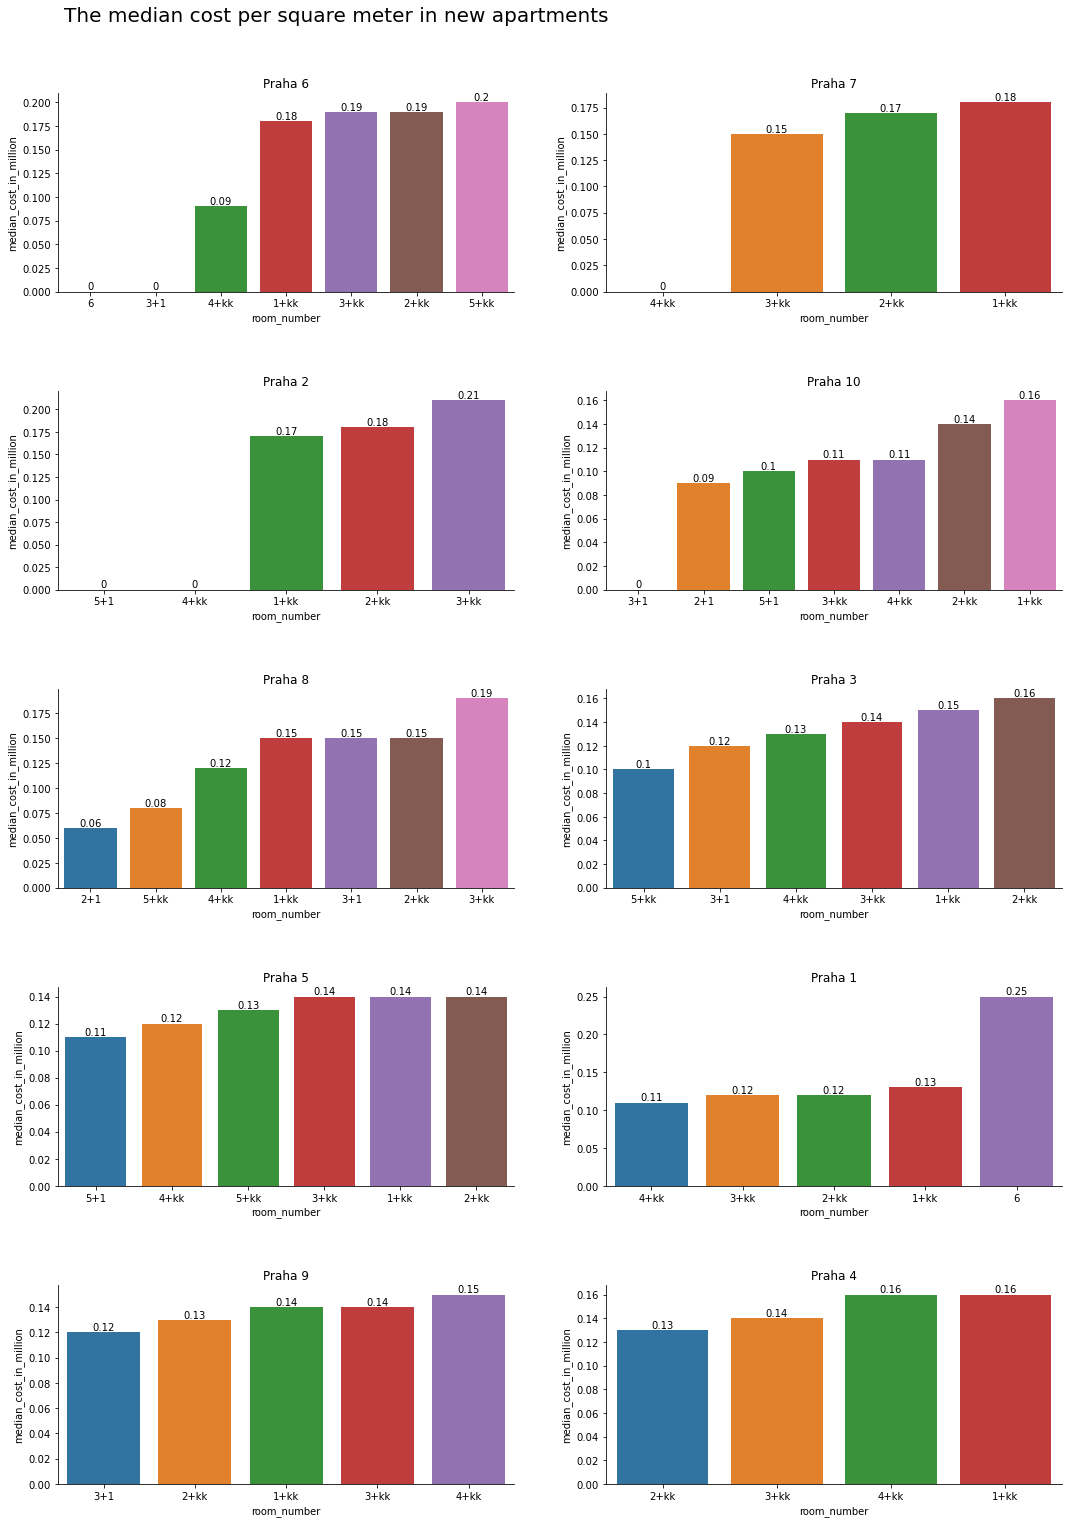

In [69]:
barplot_with_subplot_by_details('Newly built', 'price_per_square_meter',
                                'The median cost per square meter in new apartments', 0.34)

#### In construction

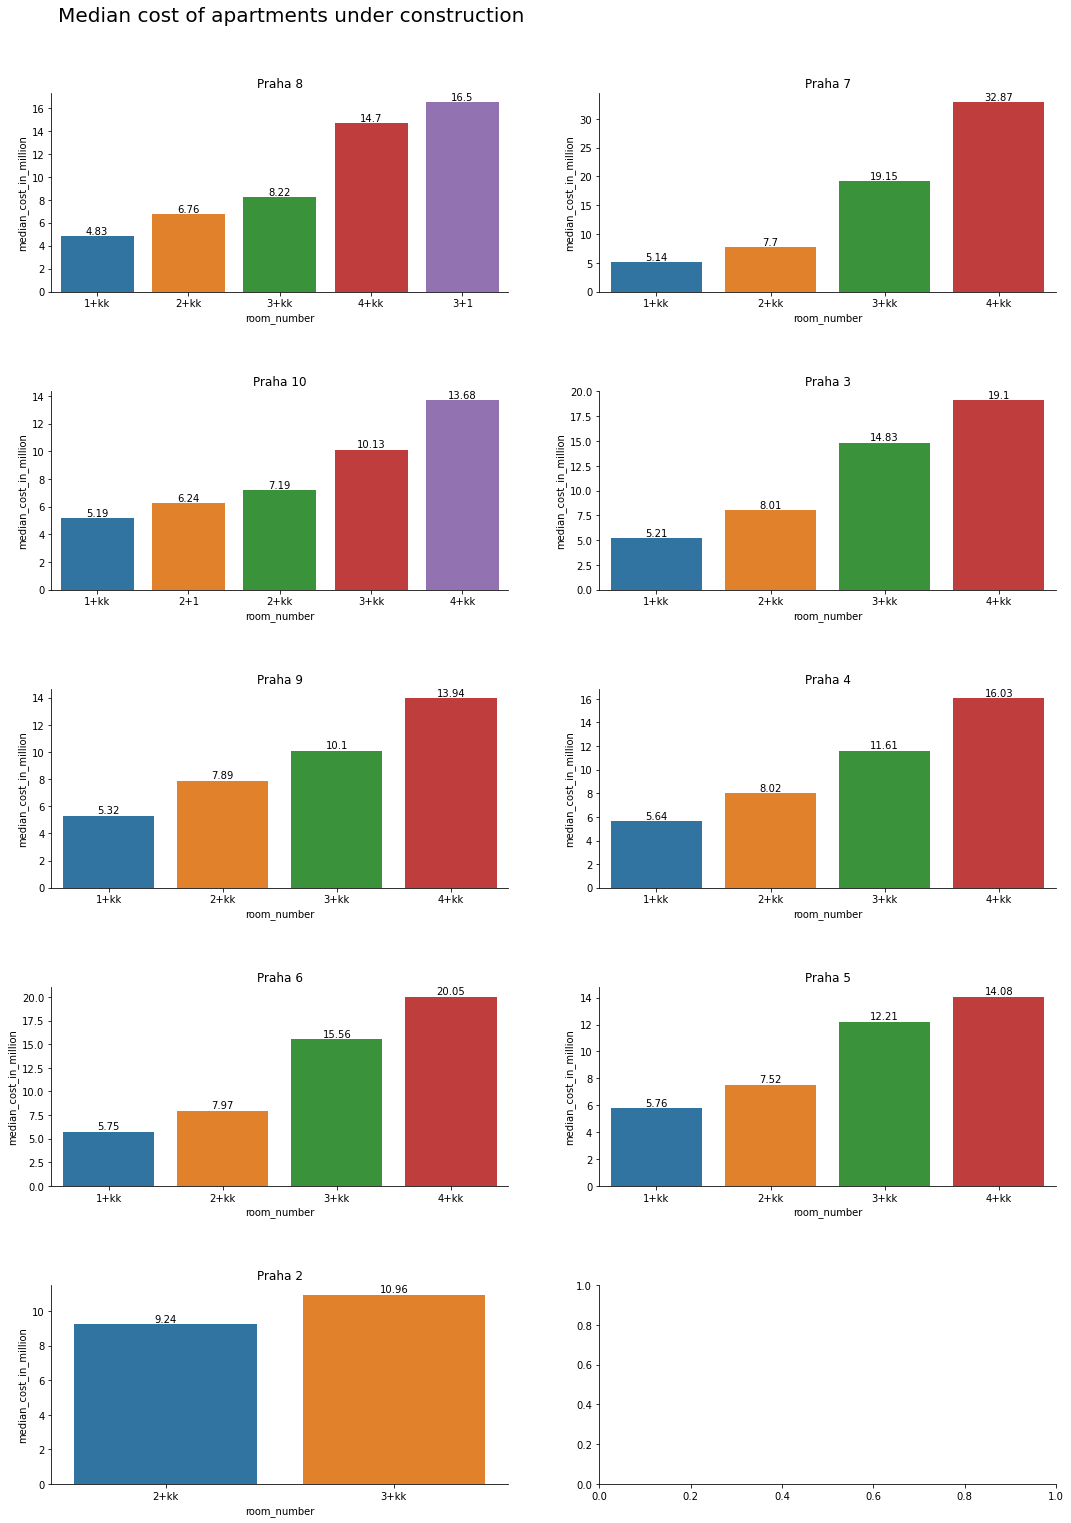

In [70]:
barplot_with_subplot_by_details(
    'In construction', 'price_in_million', 'Median cost of apartments under construction', 0.31)

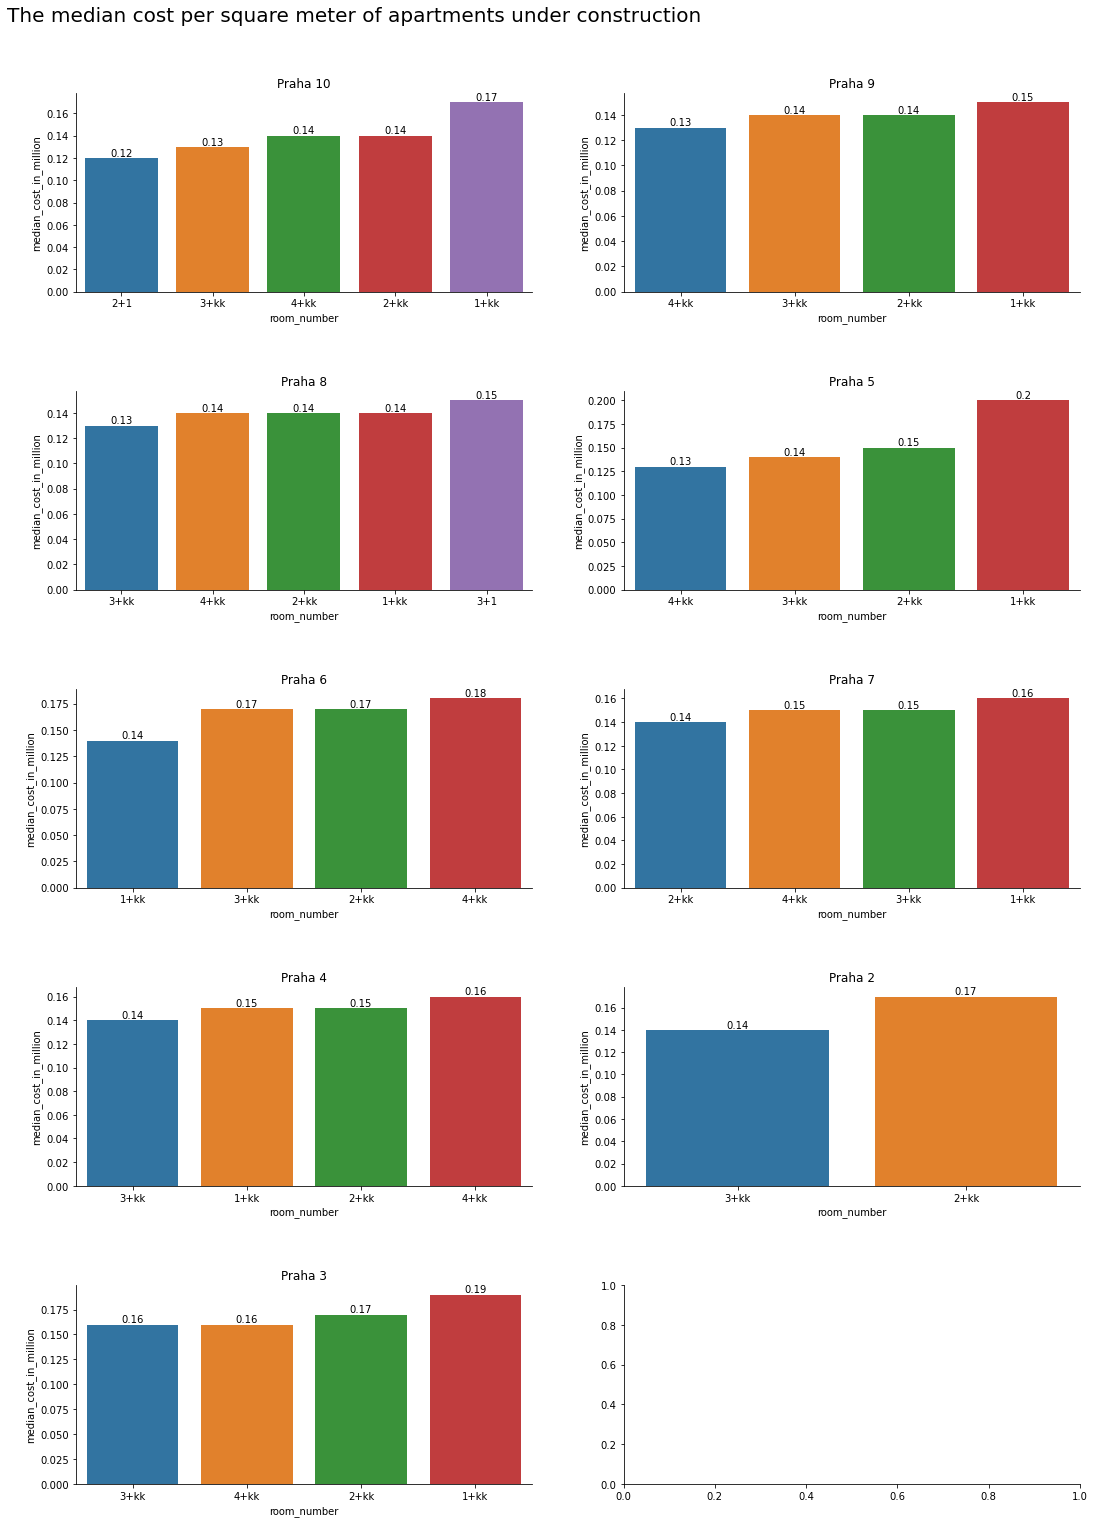

In [71]:
barplot_with_subplot_by_details('In construction', 'price_per_square_meter',
                                'The median cost per square meter of apartments under construction', 0.34)

#### After the renovation

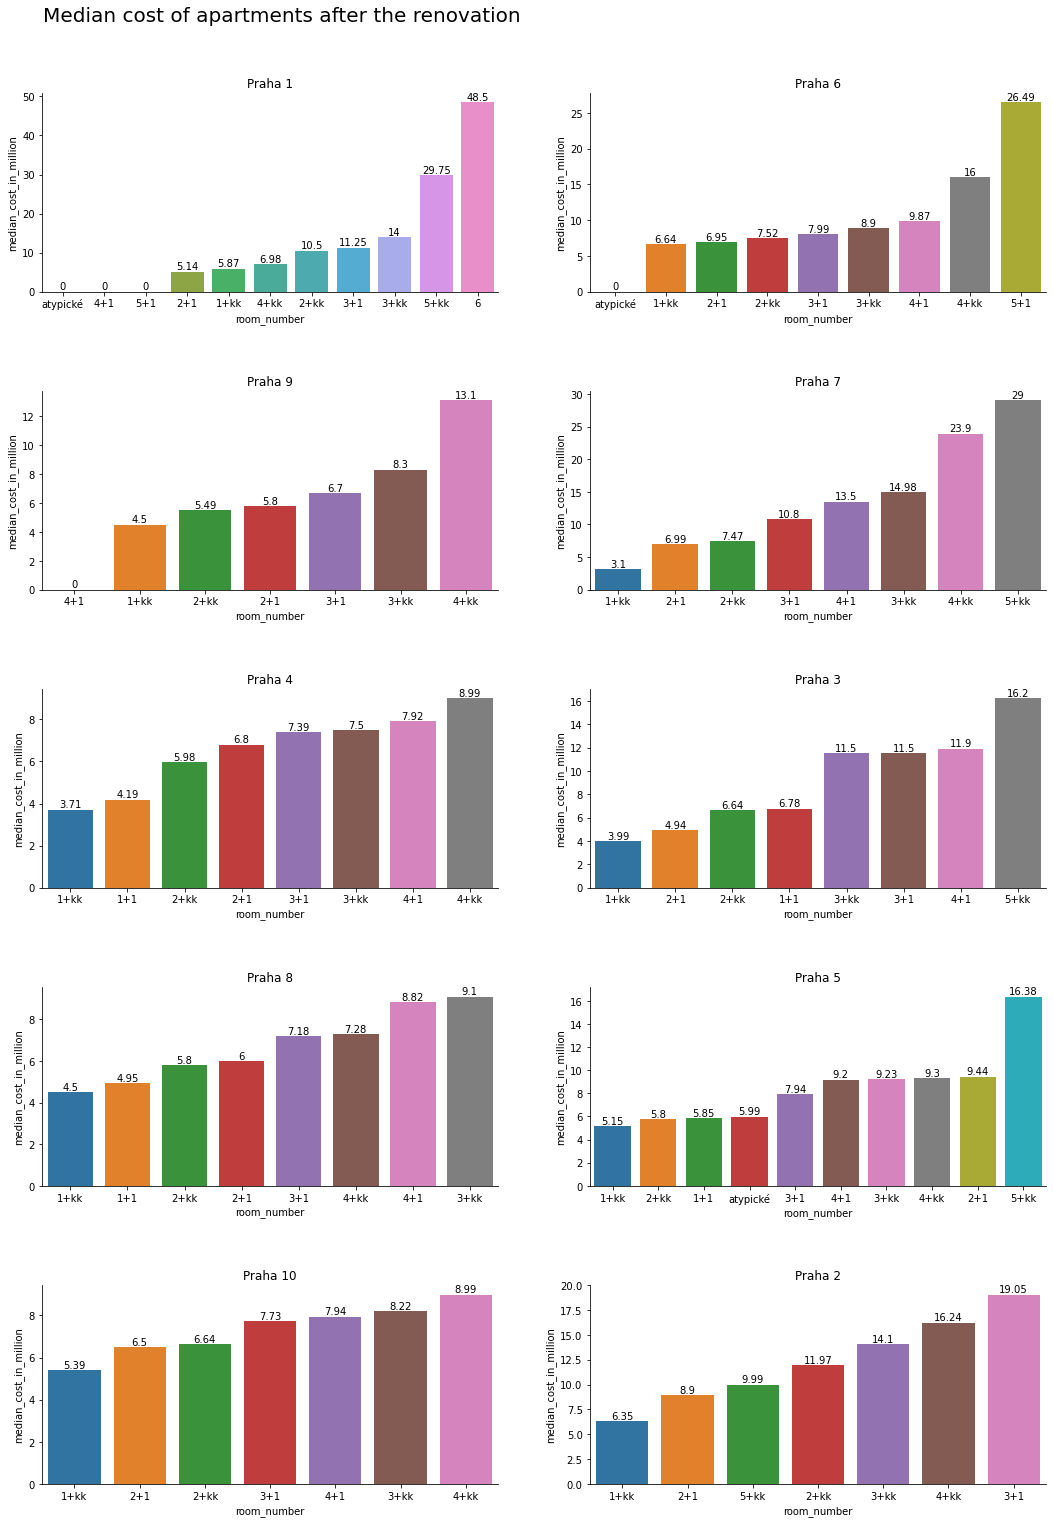

In [72]:
barplot_with_subplot_by_details(
    'After the renovation', 'price_in_million', 'Median cost of apartments after the renovation', 0.31)

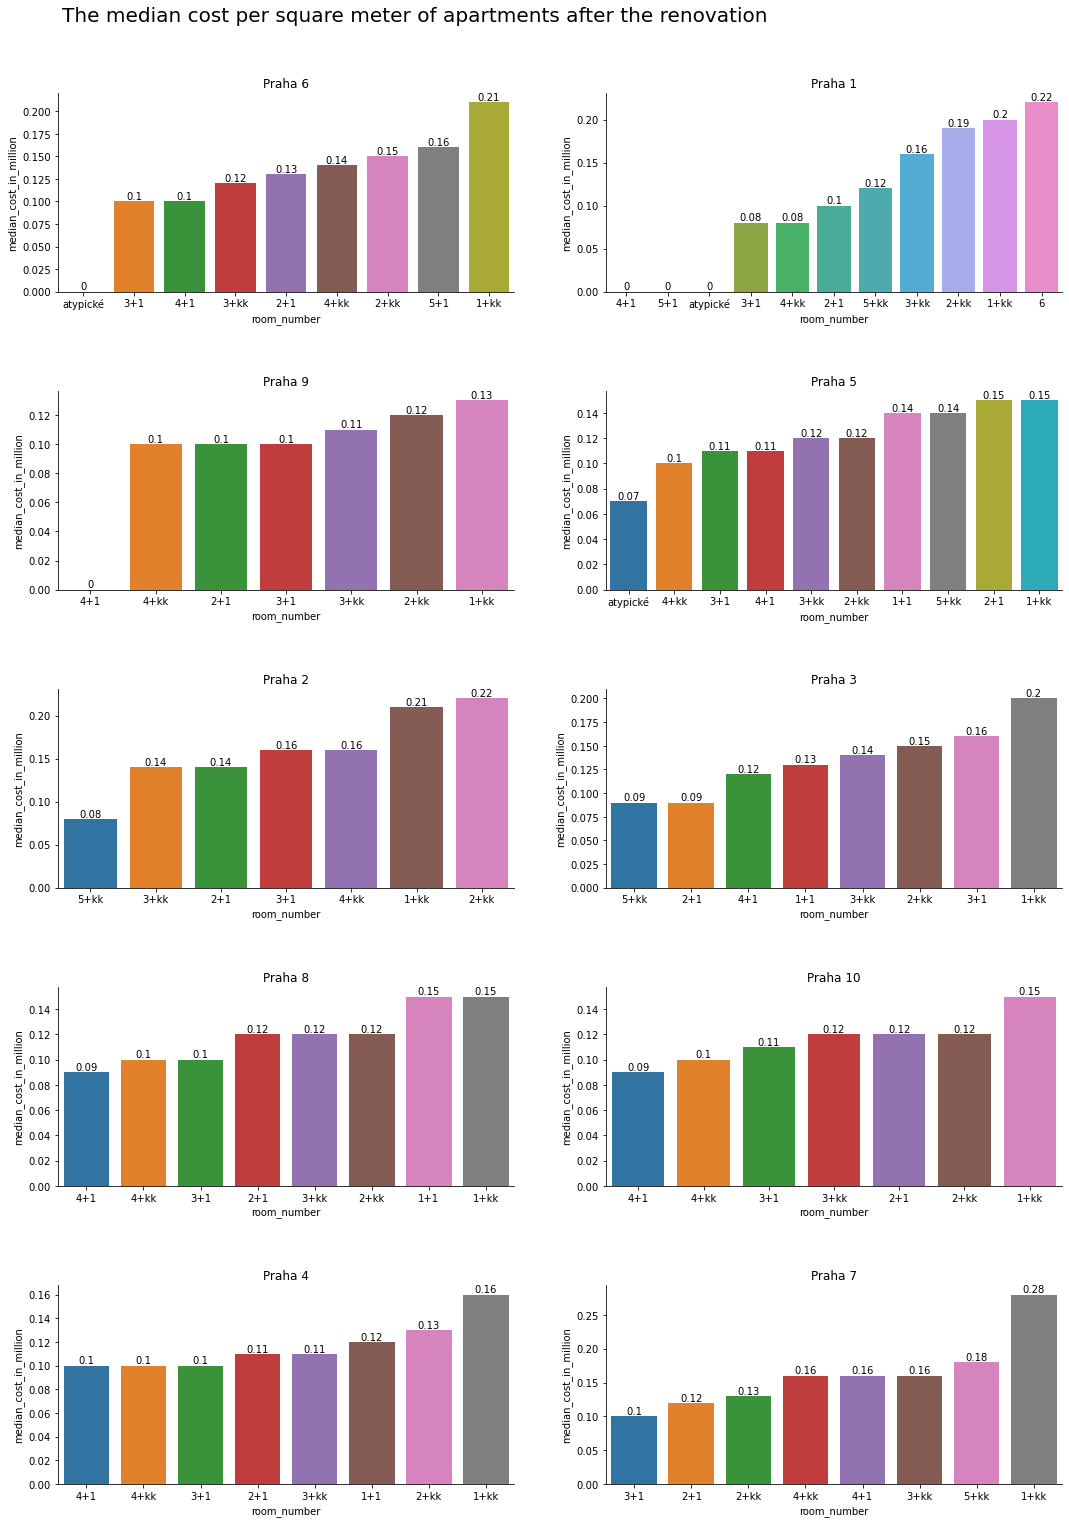

In [73]:
barplot_with_subplot_by_details('After the renovation', 'price_per_square_meter',
                                'The median cost per square meter of apartments after the renovation', 0.4)

#### The collective

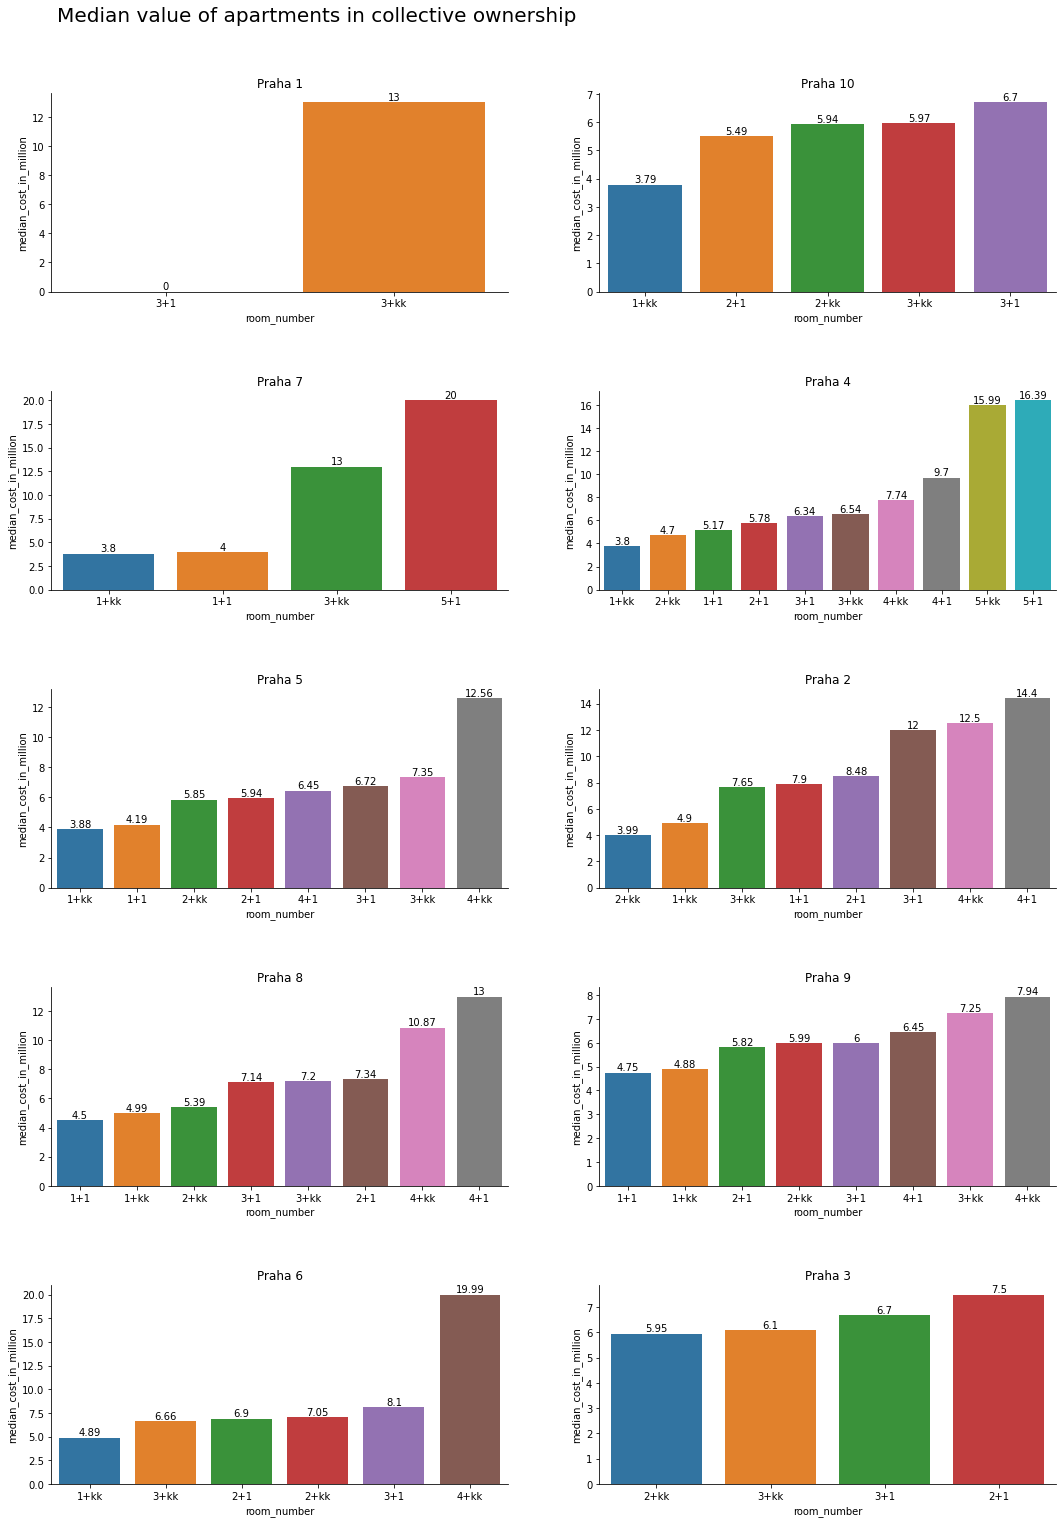

In [74]:
barplot_with_subplot_by_details(
    'The collective', 'price_in_million', 'Median value of apartments in collective ownership', 0.33)

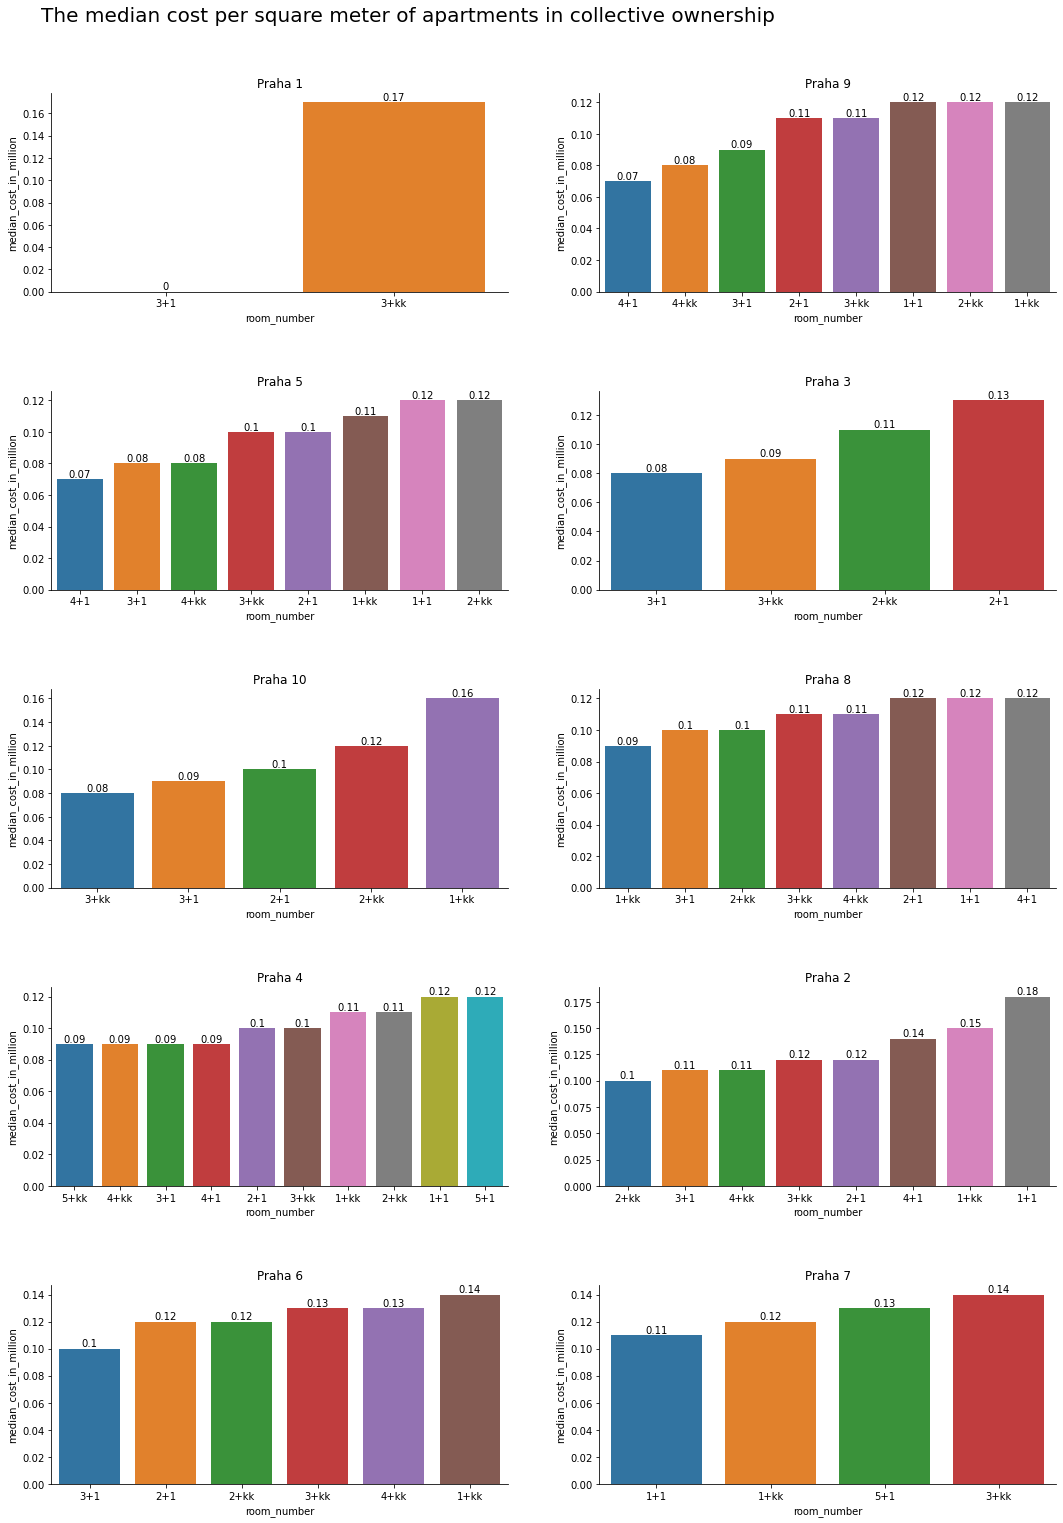

In [75]:
barplot_with_subplot_by_details('The collective', 'price_per_square_meter',
                                'The median cost per square meter of apartments in collective ownership', 0.4)

#### Panel building

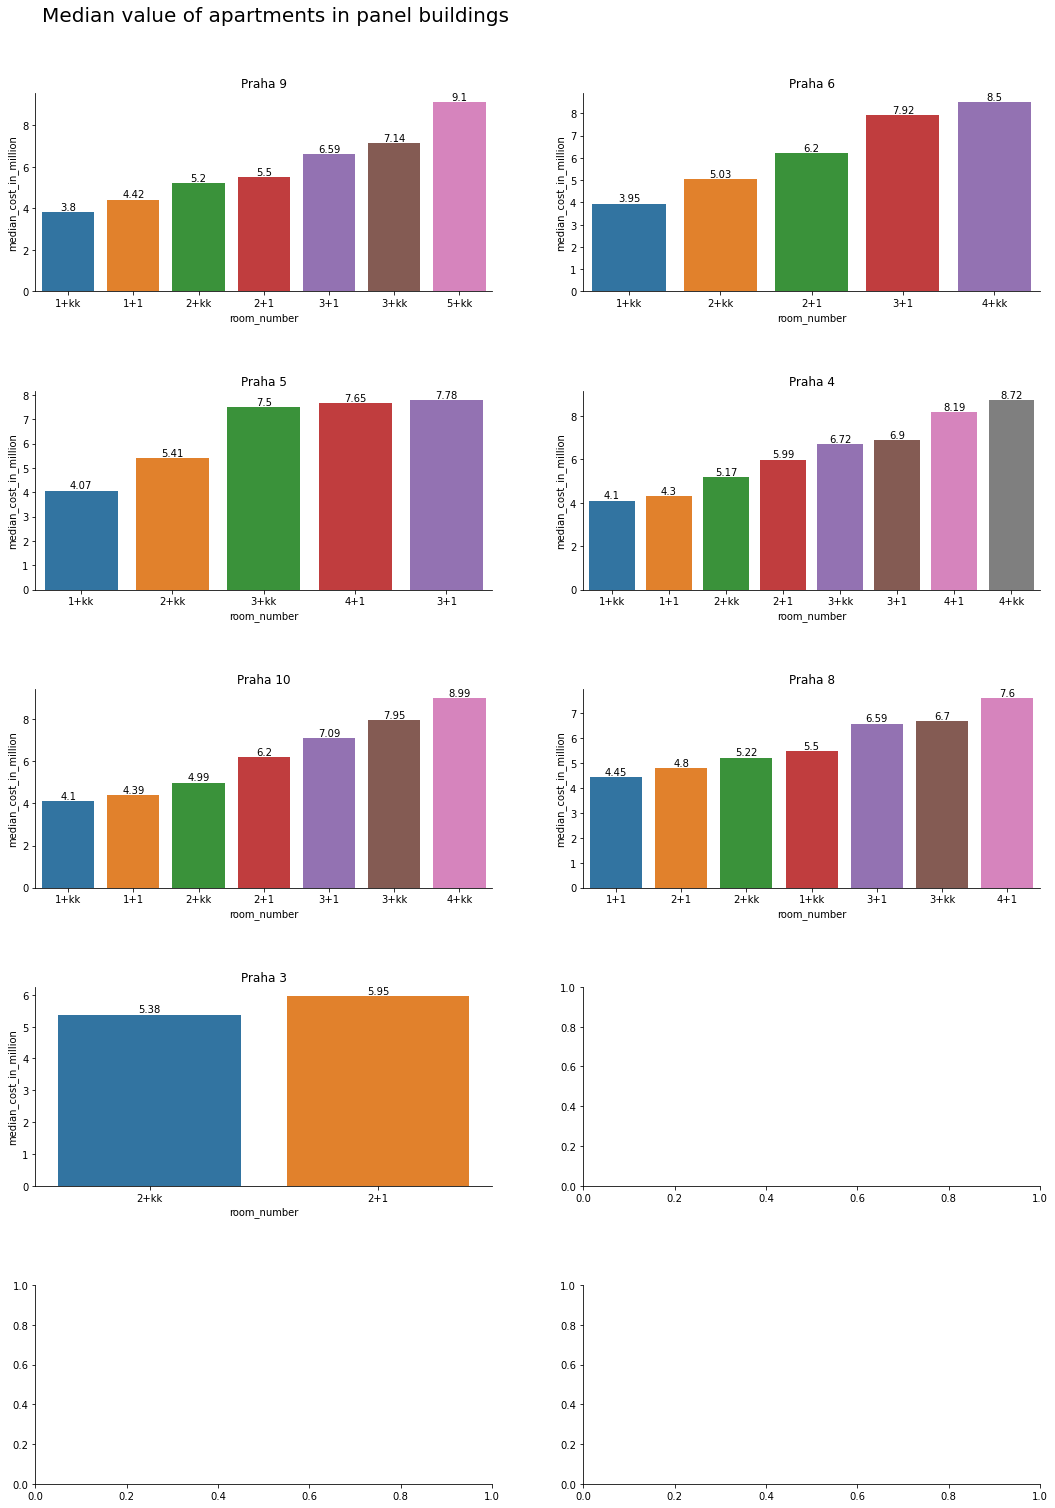

In [76]:
barplot_with_subplot_by_details(
    'Panel building', 'price_in_million', 'Median value of apartments in panel buildings', 0.31)

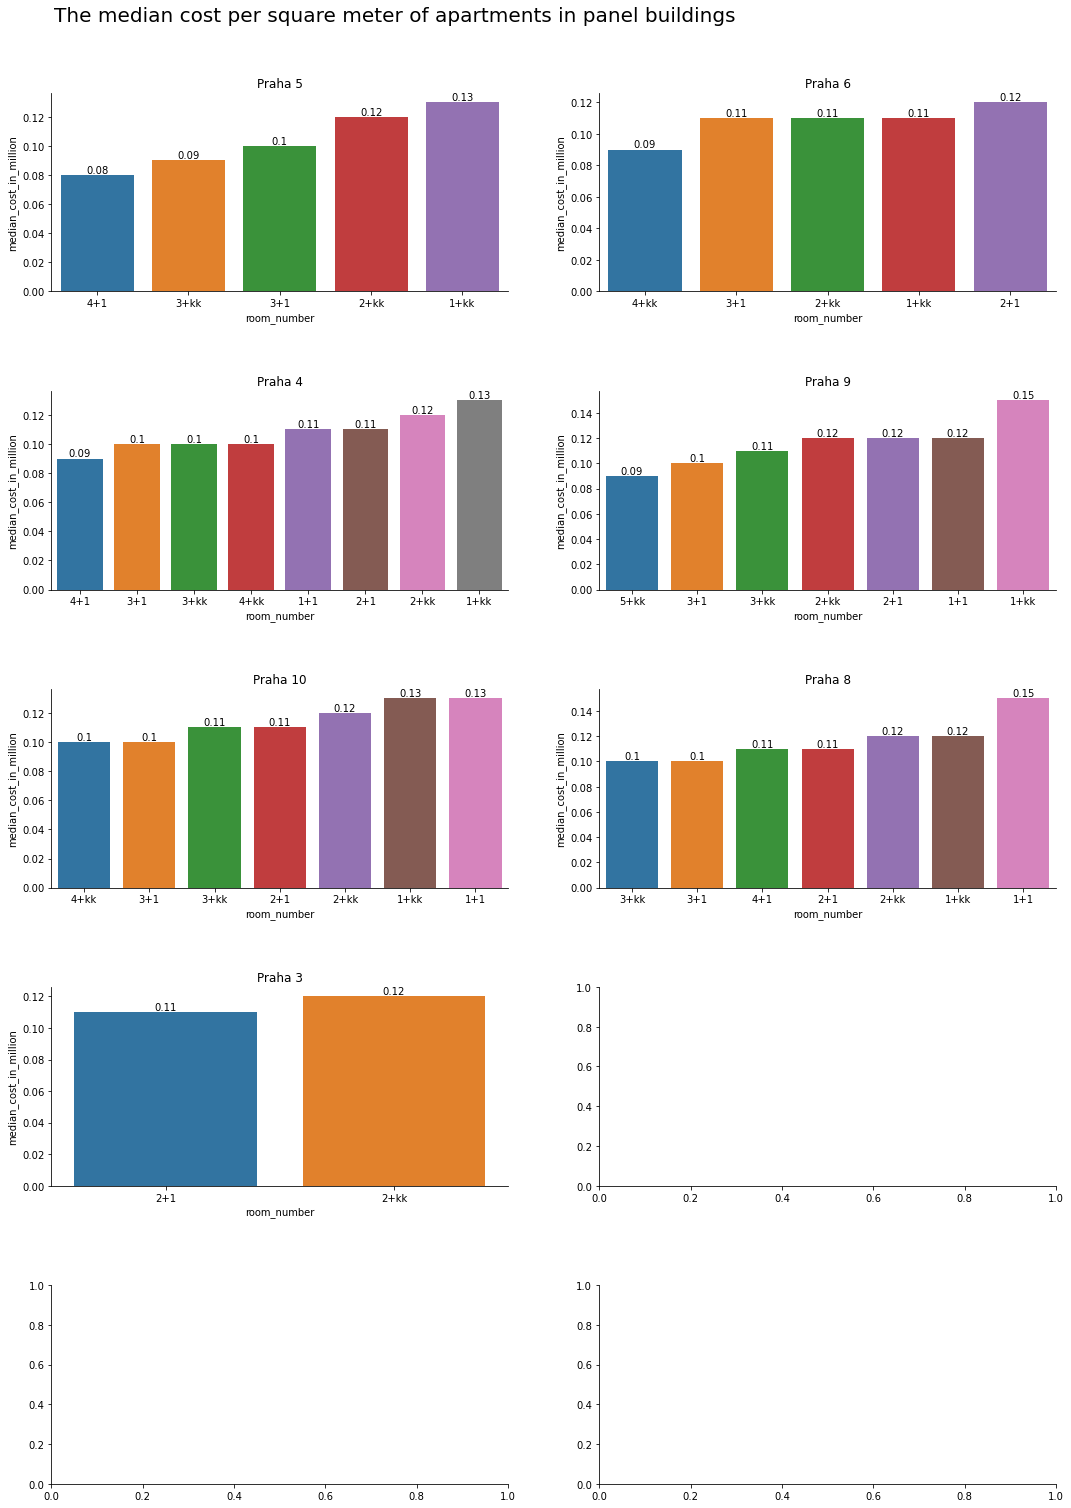

In [77]:
barplot_with_subplot_by_details('Panel building', 'price_per_square_meter',
                                'The median cost per square meter of apartments in panel buildings', 0.39)